# 과제(1), 빈칸 채우기

출처 : https://github.com/teddylee777/machine-learning/blob/master/07-Scikit-Learn/tutorial/09-%EC%95%99%EC%83%81%EB%B8%94-(Ensemble)-(%EC%8B%A4%EC%8A%B5).ipynb

**참고자료 (블로그)**

* [보팅(Voting)](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-1)
* [배깅(Bagging)](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-2)
* [부스팅(Boosting)](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-3)

### 모델별 성능평가를 위한 함수

- 시작하기에 앞서, 과제로 사용한 자료 원본 제작자인 Teddynote 님의 커스텀 모듈을 다운받아보겠습니다.

In [9]:
# 모듈 설치
!pip install teddynote -q

In [1]:
from teddynote import utils

# 그래프 사이즈 설정
utils.set_plot_options(figsize=(12, 10))

# MSE 에러 설정
utils.set_plot_error('mse')

### 필요한 데이터셋 로드

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')

np.set_printoptions(suppress=True, precision=3)

In [3]:
# 사용할 데이터셋입니다.
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X, y = housing.data, housing.target

In [13]:
X = pd.DataFrame(X, columns=housing.feature_names)
y = pd.DataFrame(y, columns=['target'])

X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

**컬럼 소개**

속성 수 : 8

* **MedInc** : 해당 지역의 중위 가구 소득 (단위: 10,000달러) / 예: 3.5 → $35,000
* **HouseAge** : 해당 지역의 주택 평균 연식
* **AveRooms** : 세대당 평균 방 개수
* **AveBedrms** : 세대당 평균 침실 개수
* **Population** : 해당 지역의 총 인구 수
* **AveOccup** : 세대당 평균 거주 인원 수
* **Latitude** : 위도 (지리적 위치)
* **Longitude** : 경도 (지리적 위치)   
   
목표 변수
* **target** : 해당 지역의 중위 주택 가격 (단위: 100,000달러) / 예: 2.5 → $250,000

### 간단한 전처리

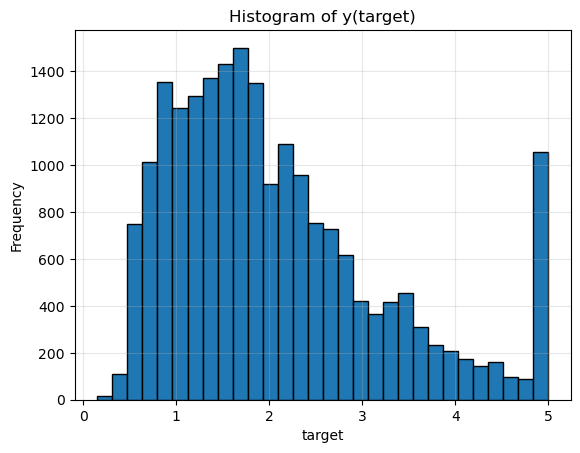

In [14]:
# 타겟변수(y)의 분포

plt.hist(y, bins=30, edgecolor='black')
plt.title("Histogram of y(target)")
plt.xlabel("target")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()

In [15]:
# 해당 데이터셋의 타겟변수(중위 주택 가격) 최댓값이 한정되어 있습니다.
print(f"최댓값: {np.max(y)}, 개수: {y[y['target'] == np.max(y)].count()}")

최댓값: 5.00001, 개수: target    965
dtype: int64


In [16]:
# 5를 초과할 경우 모두 동일한 값으로 일괄처리 되었다고 가정하고, 본 과제에서는 이 값들을 제외하겠습니다.

X = X[y['target'] <= 5].reset_index(drop=True)
y = y[y['target'] <= 5].reset_index(drop=True)

**데이터 분할**

In [4]:
from sklearn.model_selection import train_test_split

In [18]:
# test size = 0.2, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
# shape 확인
print(X_train.shape, X_test.shape)

(15740, 8) (3935, 8)


## 단일 회귀 모델

In [5]:
# 선형회귀
from sklearn.linear_model import LinearRegression
# 릿지 (L2 규제)
from sklearn.linear_model import Ridge
# 라쏘 (L1 규제)
from sklearn.linear_model import Lasso
# 엘라스틱넷
from sklearn.linear_model import ElasticNet
# 스케일러
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
# 파이프라인
from sklearn.pipeline import make_pipeline
# 다항회귀
from sklearn.preprocessing import PolynomialFeatures
# 성능평가지표
from sklearn.metrics import r2_score, mean_squared_error

### LinearRegression

In [21]:
# 모델 정의
lr = LinearRegression()

# 모델 학습
lr.fit(X_train,y_train)

# 예측
lr_pred = lr.predict(X_test)

# 성능 평가
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

print(f'R2 : {round(lr_r2, 4)}, MSE : {round(lr_mse, 4)}')

R2 : 0.5749, MSE : 0.4239


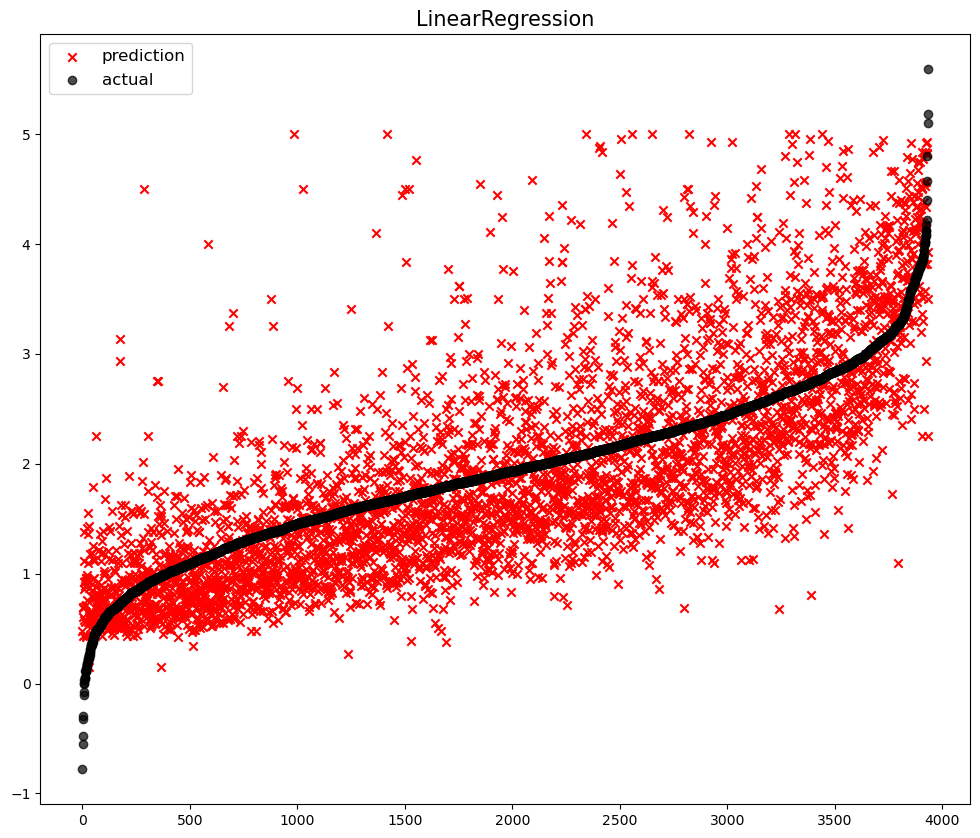

model     error
0  LinearRegression  0.423897

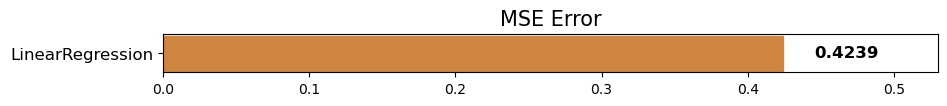

In [22]:
# 이 코드를 돌리면 예측 결과 시각화 및 각 모델의 성능이 계속 업데이트가 됩니다.
utils.plot_error('LinearRegression', lr_pred, y_test)

### Ridge

In [23]:
# 모델 정의 (규제 계수인 alpha는 0.1로 적용합니다.)
ridge = Ridge(alpha=0.1)

# 모델 학습
ridge.fit(X_train, y_train)

# 예측
ridge_pred = ridge.predict(X_test)

# 성능 평가
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

print(f'R2 : {round(ridge_r2, 4)}, MSE : {round(ridge_mse, 4)}')

R2 : 0.5749, MSE : 0.4239


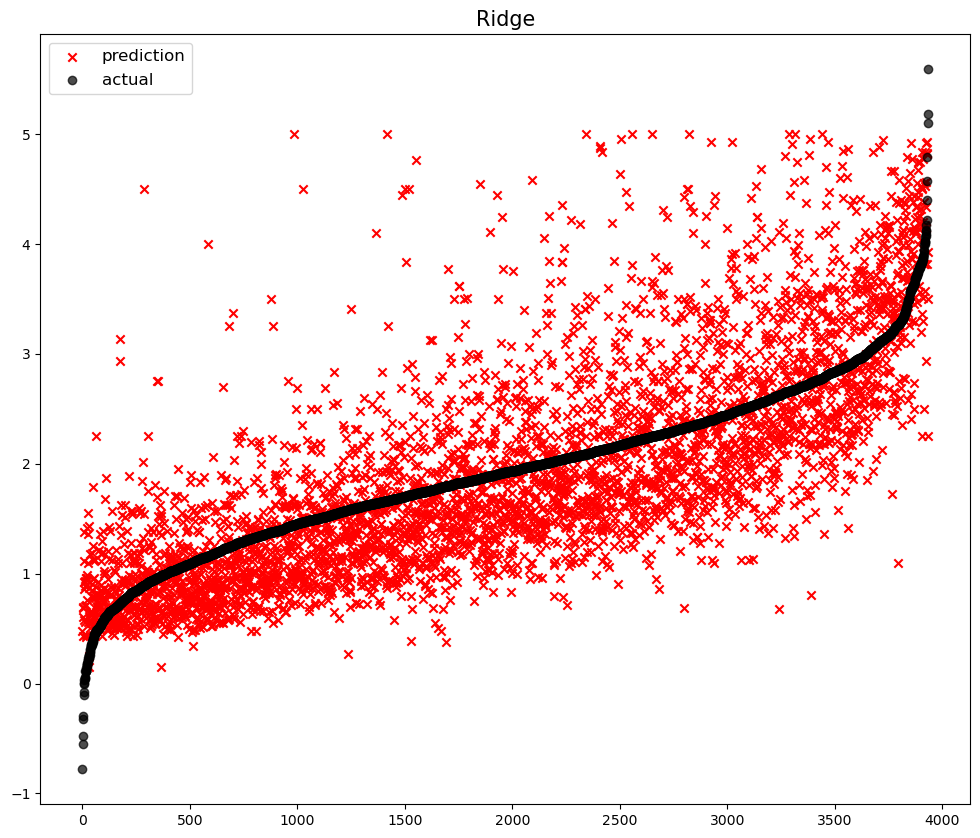

model     error
0             Ridge  0.423898
1  LinearRegression  0.423897

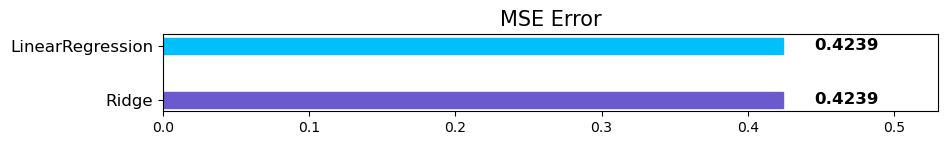

In [24]:
utils.plot_error('Ridge', ridge_pred, y_test)

### Lasso

In [25]:
# 모델 정의 (규제 계수인 alpha는 0.01로 적용합니다.)
lasso = Lasso(alpha=0.01)

# 모델 학습
lasso.fit(X_train, y_train)

# 예측
lasso_pred = lasso.predict(X_test)

# 성능 평가
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print(f'R2 : {round(lasso_r2, 4)}, MSE : {round(lasso_mse, 4)}')

R2 : 0.5645, MSE : 0.4342


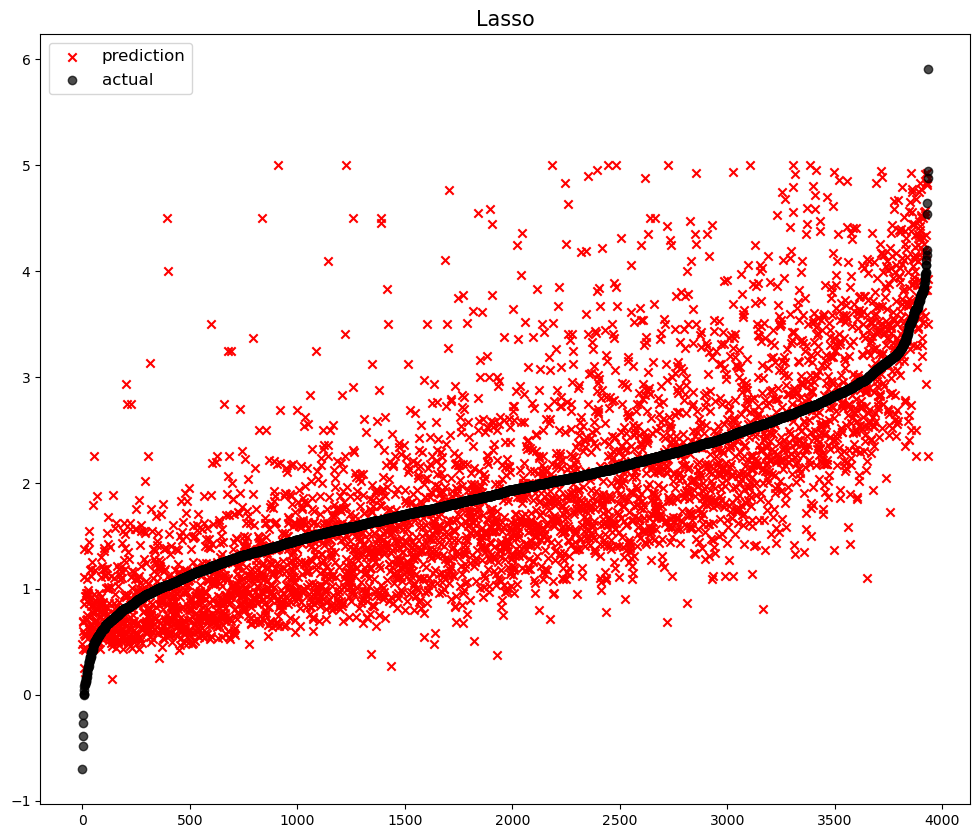

model     error
0             Lasso  0.434209
1             Ridge  0.423898
2  LinearRegression  0.423897

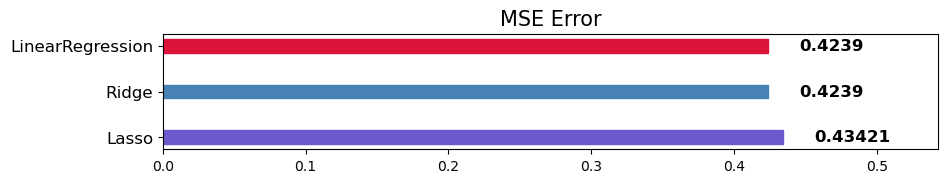

In [26]:
utils.plot_error('Lasso', lasso_pred, y_test)

### ElasticNet

In [27]:
# 모델 정의 (규제 계수 `alpha=0.001`, `l1_ratio=0.8` 로 적용합니다.)
elasticnet = ElasticNet(alpha=0.001, l1_ratio=0.8)

# 모델 학습
elasticnet.fit(X_train, y_train)

# 예측
elasticnet_pred = elasticnet.predict(X_test)

# 성능 평가
elasticnet_r2 = r2_score(y_test, elasticnet_pred)
elasticnet_mse = mean_squared_error(y_test, elasticnet_pred)

print(f'R2 : {round(elasticnet_r2, 4)}, MSE : {round(elasticnet_mse, 4)}')

R2 : 0.5744, MSE : 0.4244


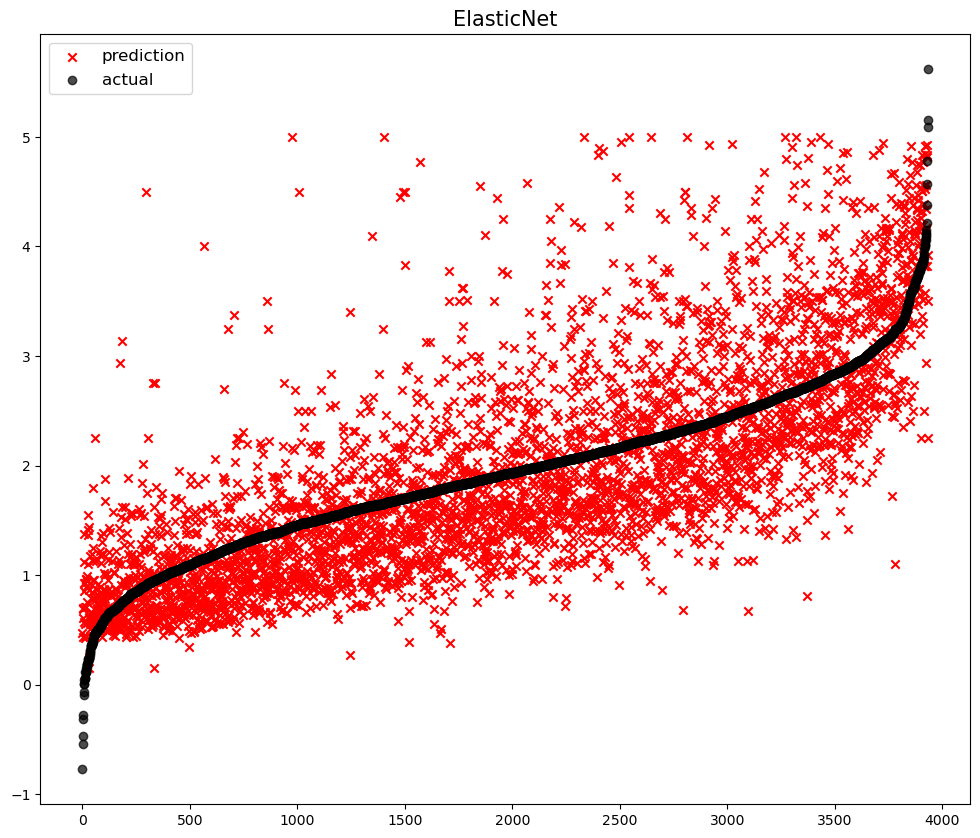

model     error
0             Lasso  0.434209
1        ElasticNet  0.424410
2             Ridge  0.423898
3  LinearRegression  0.423897

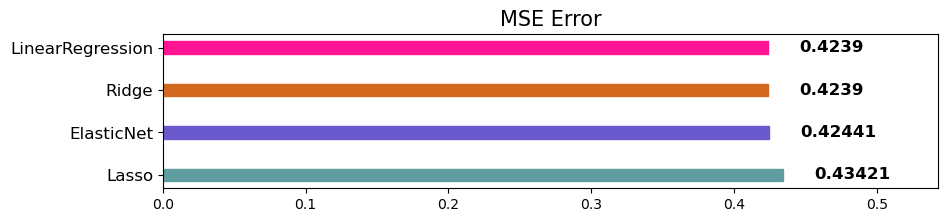

In [28]:
utils.plot_error('ElasticNet', elasticnet_pred, y_test)

### Pipeline 학습

**파이프라인(Pipeline)** 은 머신러닝에서 여러 단계를 하나의 흐름으로 묶어주는 도구입니다.   
지금까지는 스케일링과 모델학습을 따로 진행했다면, 이를 파이프라인으로 묶어 한번에 처리할 수 있습니다.   
데이터 누수 방지, 코드 간결화 등의 이유로 실무에서도 자주 사용하는 방식이라고 합니다!   

본 과제에서는 **파이프라인 학습**을 통해 StandardScaler와 ElasticNet을 동시에 적용해 보겠습니다.

In [29]:
# 파이프라인 정의 (규제 계수 `alpha=0.001`, `l1_ratio=0.8`을 적용합니다.)
standard_elasticnet = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.001, l1_ratio=0.8)
)

# 파이프라인 학습
standard_elasticnet.fit(X_train, y_train)

# 예측
standard_elasticnet_pred = standard_elasticnet.predict(X_test)

# 성능 평가
standard_elasticnet_r2 = r2_score(y_test, standard_elasticnet_pred)
standard_elasticnet_mse = mean_squared_error(y_test, standard_elasticnet_pred)

print(f'R2 : {round(standard_elasticnet_r2, 4)}, MSE : {round(standard_elasticnet_mse, 4)}')

R2 : 0.5744, MSE : 0.4244


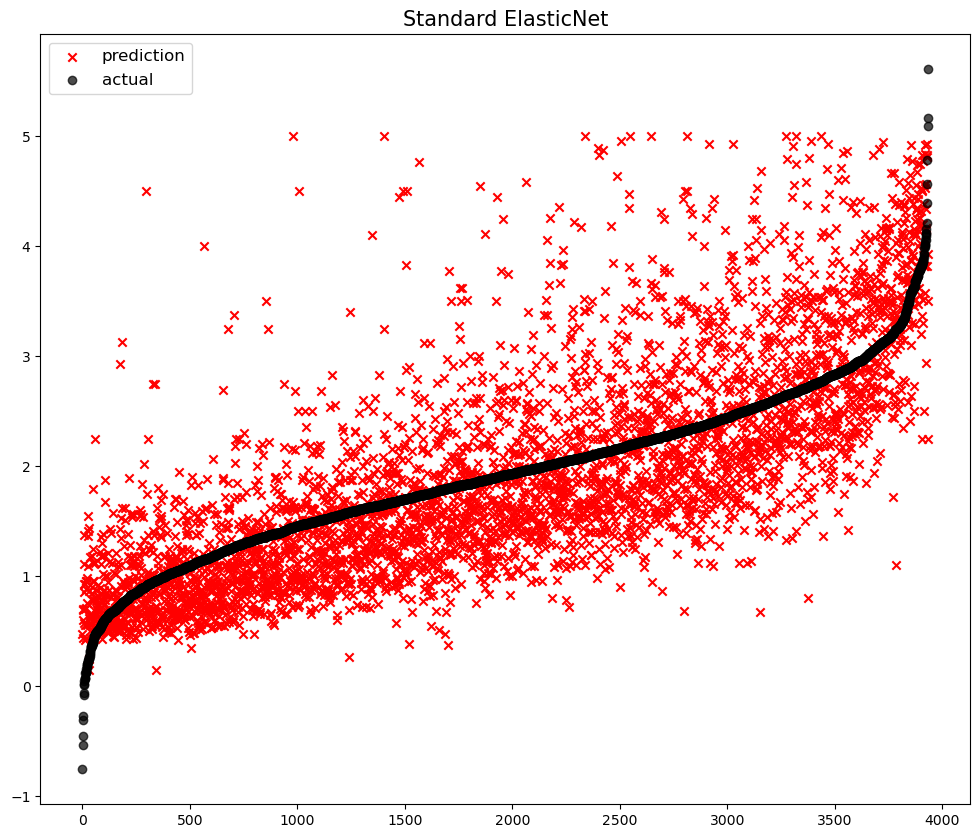

model     error
0                Lasso  0.434209
1           ElasticNet  0.424410
2  Standard ElasticNet  0.424381
3                Ridge  0.423898
4     LinearRegression  0.423897

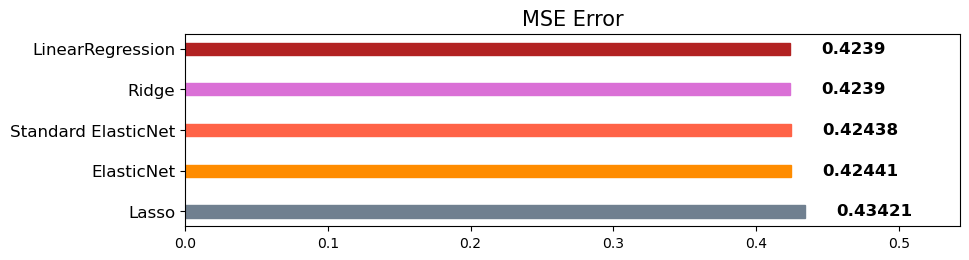

In [30]:
utils.plot_error('Standard ElasticNet', standard_elasticnet_pred, y_test)

### PolynomialFeatures

PolynomialFeatures는 다항식 회귀모델을 위해 기존 변수들을 다항식으로 만들때 사용했습니다. 기억나시나요?   
이번에는 PolynomialFeatures와 Standard 스케일링을 진행한 ElasticNet의 파이프라인 학습을 진행해보겠습니다.

In [31]:
# 파이프라인 정의 
# (PolynomialFeatures는 `degree=2`, `include_bias=False`를 적용합니다.)
# (ElasticNet 모델은 규제 계수 `alpha=0.001`, `l1_ratio=0.8 을 적용합니다.)
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.001, l1_ratio=0.8)
)

# 모델 학습
poly_pipeline.fit(X_train, y_train)

# 예측
poly_pipeline_pred = poly_pipeline.predict(X_test)

# 성능 평가
poly_pipeline_r2 = r2_score(y_test, poly_pipeline_pred)
poly_pipeline_mse = mean_squared_error(y_test, poly_pipeline_pred)

print(f'R2 : {round(poly_pipeline_r2, 4)}, MSE : {round(poly_pipeline_mse, 4)}')

R2 : 0.6074, MSE : 0.3915


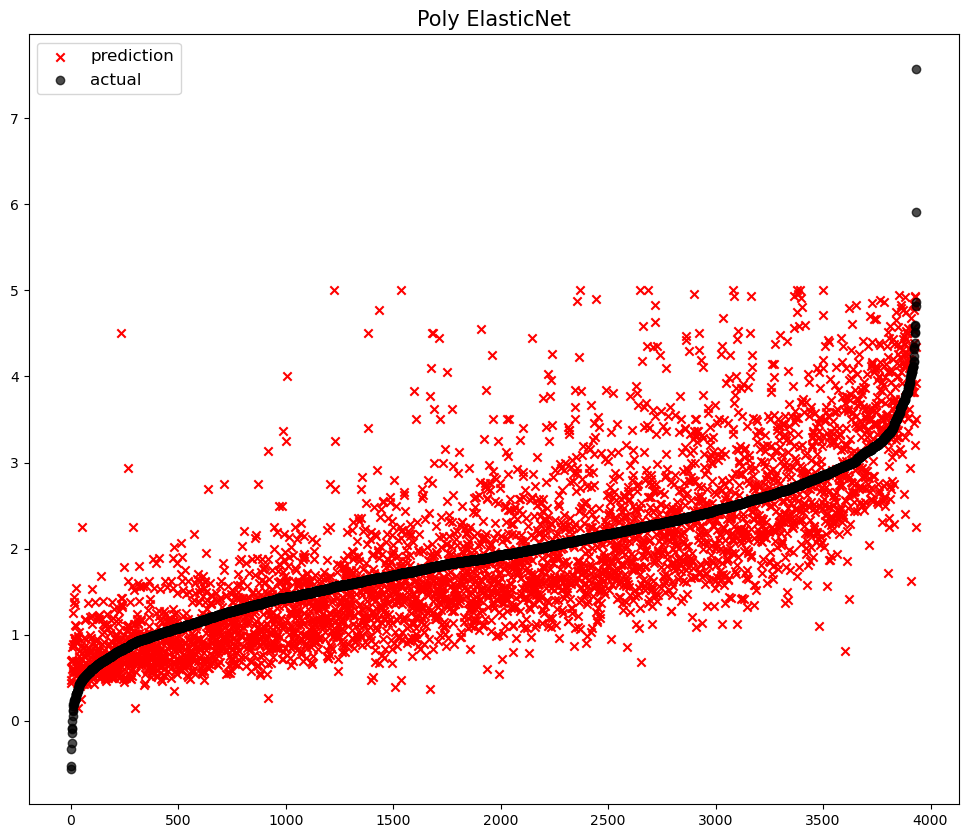

model     error
0                Lasso  0.434209
1           ElasticNet  0.424410
2  Standard ElasticNet  0.424381
3                Ridge  0.423898
4     LinearRegression  0.423897
5      Poly ElasticNet  0.391494

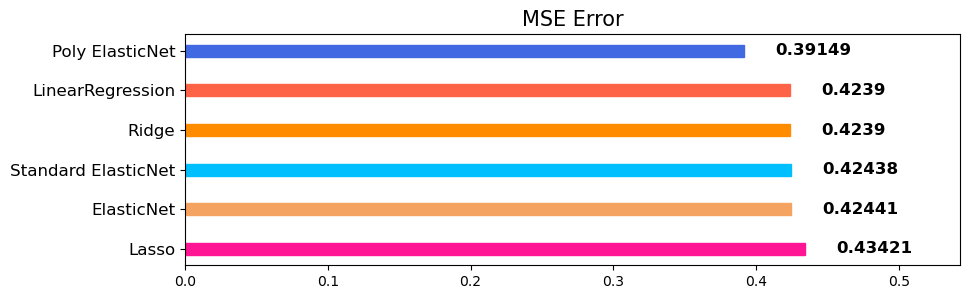

In [32]:
utils.plot_error('Poly ElasticNet', poly_pipeline_pred, y_test)

## 앙상블 모델

### 보팅 (Voting) - 회귀 (Regression)

Voting은 단어 뜻 그대로 **투표를 통해 결정하는 방식**입니다. Voting은 Bagging과 투표방식이라는 점에서 유사하지만, 다음과 같은 큰 차이점이 있습니다.

- Voting은 다른 알고리즘 model을 조합해서 사용합니다.
- Bagging은 같은 알고리즘 내에서 다른 sample 조합을 사용합니다.

In [6]:
from sklearn.ensemble import VotingRegressor, VotingClassifier

반드시, **Tuple 형태로 모델**을 정의해야 합니다.

In [34]:
single_models = [
    ('lr', lr), 
    ('ridge', ridge), 
    ('lasso', lasso), 
    ('standard_elasticnet', standard_elasticnet), 
    ('poly_pipeline', poly_pipeline)
]

In [35]:
voting_regressor = VotingRegressor(single_models)

In [36]:
voting_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('ridge', Ridge(alpha=0.1)),
                            ('lasso', Lasso(alpha=0.01)),
                            ('standard_elasticnet',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.001,
                                                         l1_ratio=0.8))])),
                            ('poly_pipeline',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.001,
                                                         l1_ratio=0.8))]))])

In [37]:
voting_pred = voting_regressor.predict(X_test)

In [38]:
# 성능 평가
voting_r2 = r2_score(y_test, voting_pred)
voting_mse = mean_squared_error(y_test, voting_pred)

print(f'R2 : {round(voting_r2, 4)}, MSE : {round(voting_mse, 4)}')

R2 : 0.5835, MSE : 0.4153


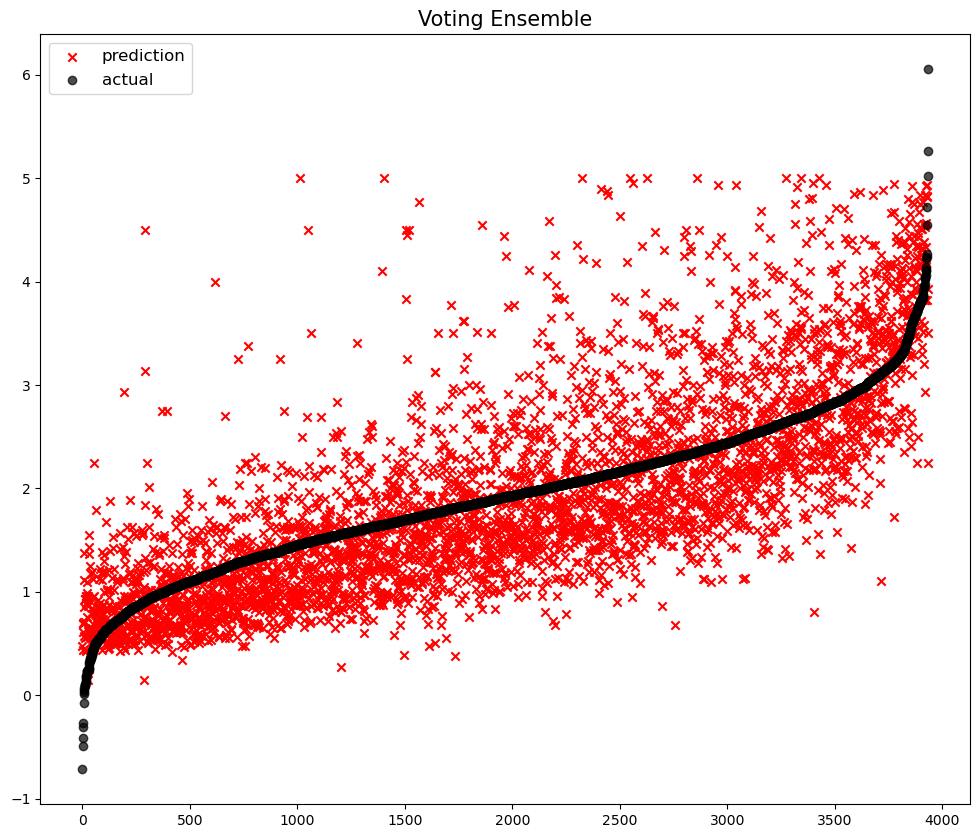

model     error
0                Lasso  0.434209
1           ElasticNet  0.424410
2  Standard ElasticNet  0.424381
3                Ridge  0.423898
4     LinearRegression  0.423897
5      Voting Ensemble  0.415333
6      Poly ElasticNet  0.391494

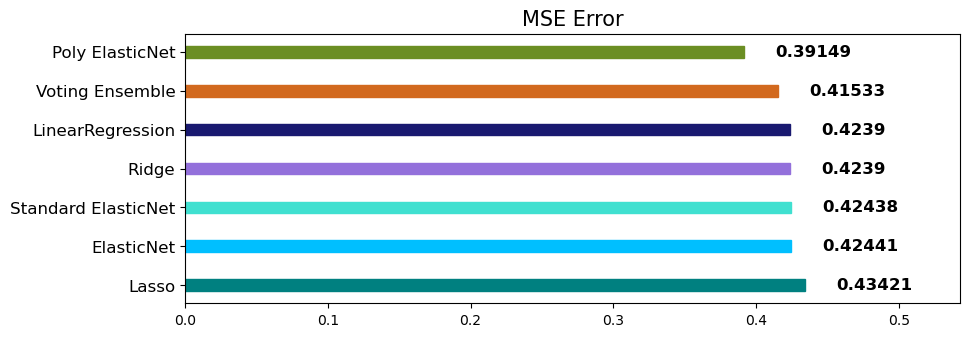

In [39]:
utils.plot_error('Voting Ensemble', voting_pred, y_test)

## 보팅 (Voting) - 분류 (Classification)

[자세한 내용 보기](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-1)

분류기 모델을 만들때, Voting 앙상블은 1가지의 **중요한 parameter**가 있습니다.   
`voting` = {'hard', 'soft'}

#### **hard** voting

class를 0, 1로 분류 예측을 하는 이진 분류를 예로 들어 보겠습니다.   
   
Hard Voting 방식에서는 결과 값에 대한 다수 class를 차용합니다.   
분류를 예측한 값이 1, 0, 0, 1, 1 이었다고 가정한다면, 1이 3표, 0이 2표를 받았기 때문에 Hard Voting 방식에서는 1이 최종 값으로 예측을 하게 됩니다.

#### **soft** voting

Soft Voting 방식은 각각의 확률의 평균 값을 계산한 다음에 가장 확률이 높은 값으로 확정짓게 됩니다.

가령 class 0이 나올 확률이 (0.4, 0.9, 0.9, 0.4, 0.4)이었고, class 1이 나올 확률이 (0.6, 0.1, 0.1, 0.6, 0.6) 이었다면, 

- class 0이 나올 최종 확률은 (0.4+0.9+0.9+0.4+0.4) / 5 = 0.44, 
- class 1이 나올 최종 확률은 (0.6+0.1+0.1+0.6+0.6) / 5 = 0.4 

가 되기 때문에 앞선 Hard Voting과는 다른 결과가 최종 산출됩니다.   

#### 참고) **회귀**에서의 보팅

회귀에서 Voting과 Soft Voting이 헷갈릴 수 있는데, 두 방식은 서로 다른 개념입니다.   
- Soft Voting은 각 모델이 특정 클래스라고 예측한 확률의 평균을 구함
- 회귀에서의 Voting은 모든 회귀기의 예측값을 단순 평균하에 최종 예측을 함
   
그래서 사실 Hard / Soft Voting이라는 용어도 분류에서만 쓰이는 개념인 것이죠!

In [7]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [41]:
models = [
    ('Logi', LogisticRegression()), 
    ('ridge', RidgeClassifier())
]

In [42]:
# voting 옵션에 대하여 지정합니다.
vc = VotingClassifier(models, voting='soft')

## 배깅(Bagging)

Bootstrap + Aggregating   
1. 부트스트랩을 통해 전체 데이터셋에서 중복을 허용하여 무작위로 재표본 추출을 하고,
2. 동일한 알고리즘 모델을 사용해 각각의 샘플을 독립적으로 학습하고,
3. 모든 모델의 예측값을 결합해 최종 결과를 도출하는 방법입니다.

[자세한 내용 보기](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-2)

**Voting VS Bagging**

* **Voting**이 여러 알고리즘의 조합에 대한 앙상블이라면...
* **Bagging**은 하나의 단일 알고리즘에 대하여 여러 개의 샘플 조합으로 앙상블한다는 차이가 있습니다.

### RandomForest

- DecisionTree기반 Bagging 앙상블 모델입니다.
- 사용이 쉽고, 성능도 우수해서 매우 인기가 많습니다.

In [8]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [44]:
# 모델 정의 (random_state = 42)
rfr = RandomForestRegressor(random_state=42)

# 모델 학습
rfr.fit(X_train,y_train)

# 예측
rfr_pred = rfr.predict(X_test)

# 성능 평가 
rfr_r2 = r2_score(y_test, rfr_pred)
rfr_mse = mean_squared_error(y_test, rfr_pred)

print(f'R2 : {round(rfr_r2, 4)}, MSE : {round(rfr_mse, 4)}')

R2 : 0.7759, MSE : 0.2235


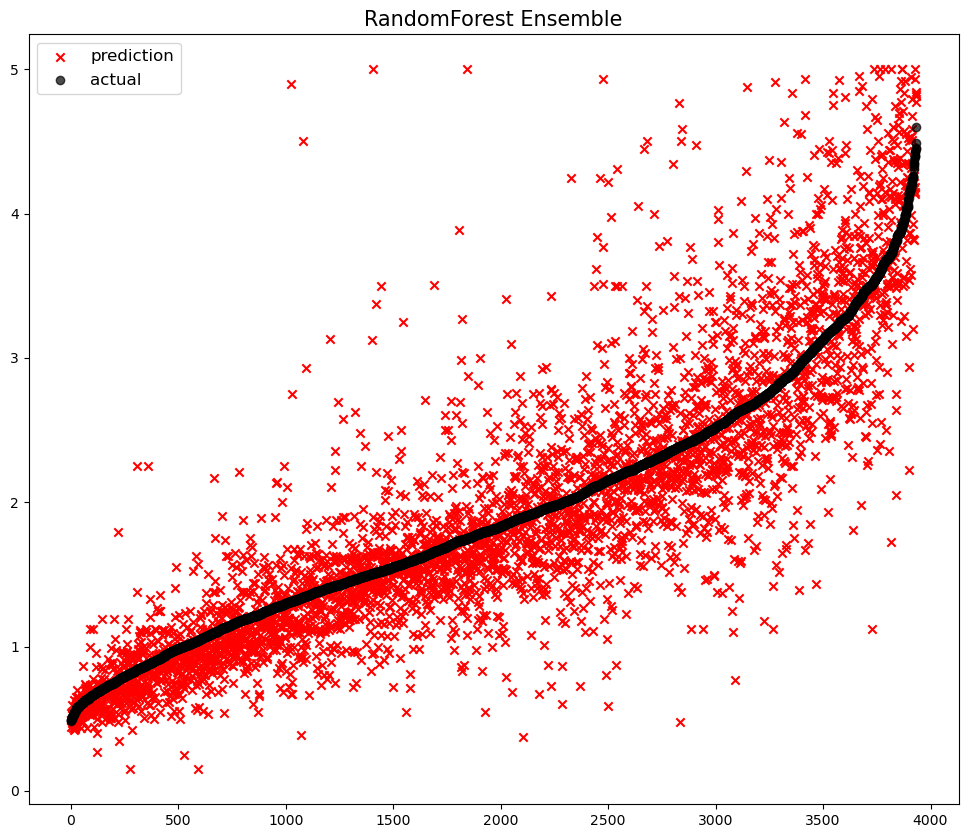

model     error
0                  Lasso  0.434209
1             ElasticNet  0.424410
2    Standard ElasticNet  0.424381
3                  Ridge  0.423898
4       LinearRegression  0.423897
5        Voting Ensemble  0.415333
6        Poly ElasticNet  0.391494
7  RandomForest Ensemble  0.223458

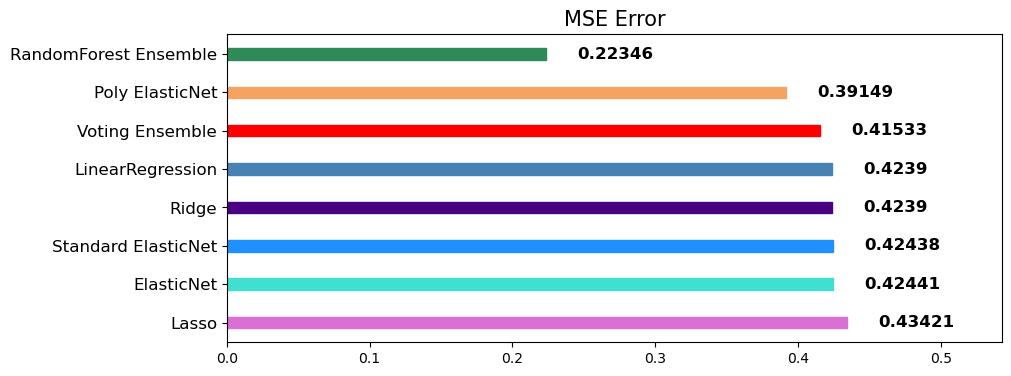

In [45]:
utils.plot_error('RandomForest Ensemble', rfr_pred, y_test)

**주요 Hyperparameter**

- `random_state`: 랜덤 시드 값. 고정해두고 튜닝할 것!
- `n_jobs`: CPU 사용 개수
- `max_depth`: 깊어질 수 있는 최대 깊이. 과대적합 방지용
- `n_estimators`: 앙상블하는 트리의 개수
- `max_features`: 최대로 사용할 feature의 개수. 과대적합 방지용
- `min_samples_split`: 트리가 분할할 때 최소 샘플의 개수. default=2. 과대적합 방지용

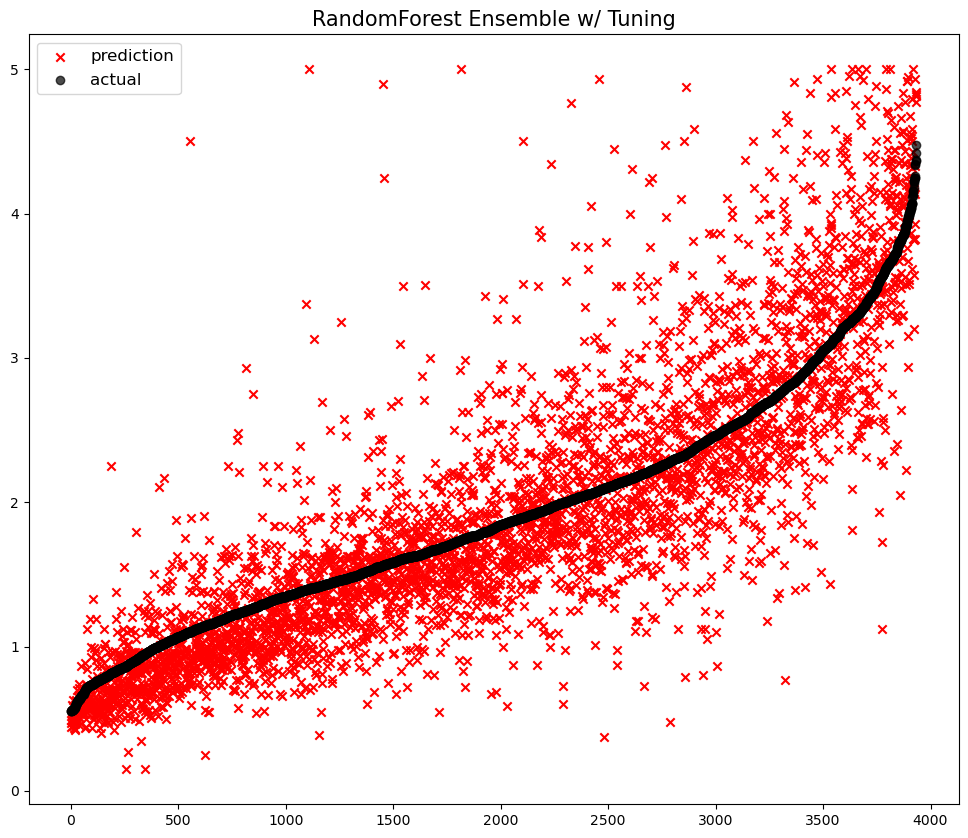

model     error
0                            Lasso  0.434209
1                       ElasticNet  0.424410
2              Standard ElasticNet  0.424381
3                            Ridge  0.423898
4                 LinearRegression  0.423897
5                  Voting Ensemble  0.415333
6                  Poly ElasticNet  0.391494
7  RandomForest Ensemble w/ Tuning  0.266462
8            RandomForest Ensemble  0.223458

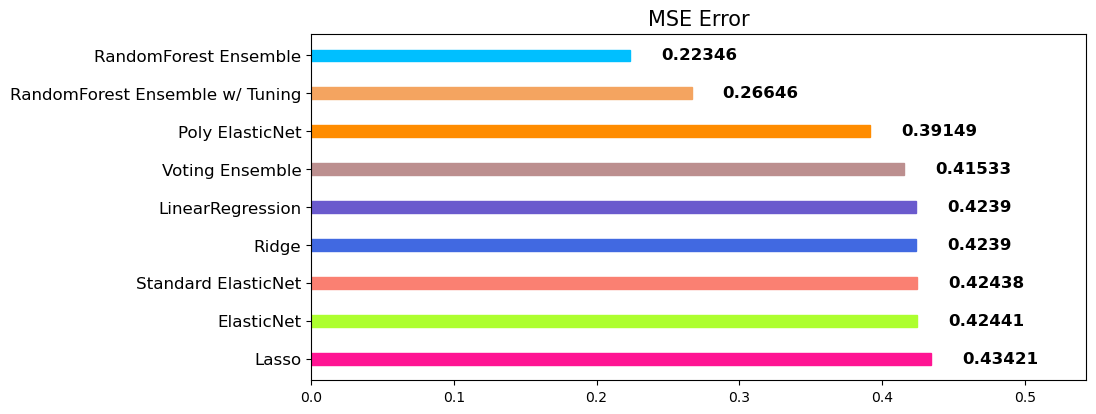

In [46]:
# 위 하이퍼파라미터를 직접 지정할 수도 있습니다.
# 물론 최적의 파라미터를 찾기 위해서는 튜닝 과정을 거쳐야 합니다. (밑에서 잠깐 나옵니다.)

# 주의) 튜닝을 할 땐 반드시 random_state 값을 고정시켜야 합니다!

rfr = RandomForestRegressor(random_state=42, n_estimators=1500, max_depth=9, max_features=0.9)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
utils.plot_error('RandomForest Ensemble w/ Tuning', rfr_pred, y_test)

In [47]:
print(f'R2 : {round(r2_score(y_test, rfr_pred), 4)}, MSE : {round(mean_squared_error(y_test, rfr_pred), 4)}')

R2 : 0.7328, MSE : 0.2665


## 부스팅 (Boosting)

[자세한 내용 보기]('https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-3')

약한 학습기를 순차적으로 학습을 하되, 이전 학습에 대하여 잘못 예측된 데이터에 **가중치를 부여해 오차를 보완**해 나가는 방식입니다.

**장점** 
- 성능이 매우 우수합니다. (Lgbm, XGBoost 등)

**단점**
- 부스팅 알고리즘의 특성상 계속 약점(오분류/잔차)을 보완하려고 하기 때문에 **잘못된 레이블링이나 아웃라이어에 필요 이상으로 민감**할 수 있습니다.
- 순차적이기 때문에 병렬처리에 어려움이 있고, 그렇다보니 **학습 시간이 오래걸립니다.**.

### GradientBoost

In [9]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [49]:
# 모델 정의 (random_state = 42)
gbr = GradientBoostingRegressor(random_state=42)

# 모델 학습
gbr.fit(X_train,y_train)

# 예측
gbr_pred = gbr.predict(X_test)

# 성능 평가
gbr_r2 = r2_score(y_test, gbr_pred)
gbr_mse = mean_squared_error(y_test, gbr_pred)

print(f'R2 : {round(gbr_r2, 4)}, MSE : {round(gbr_mse, 4)}')

R2 : 0.7507, MSE : 0.2486


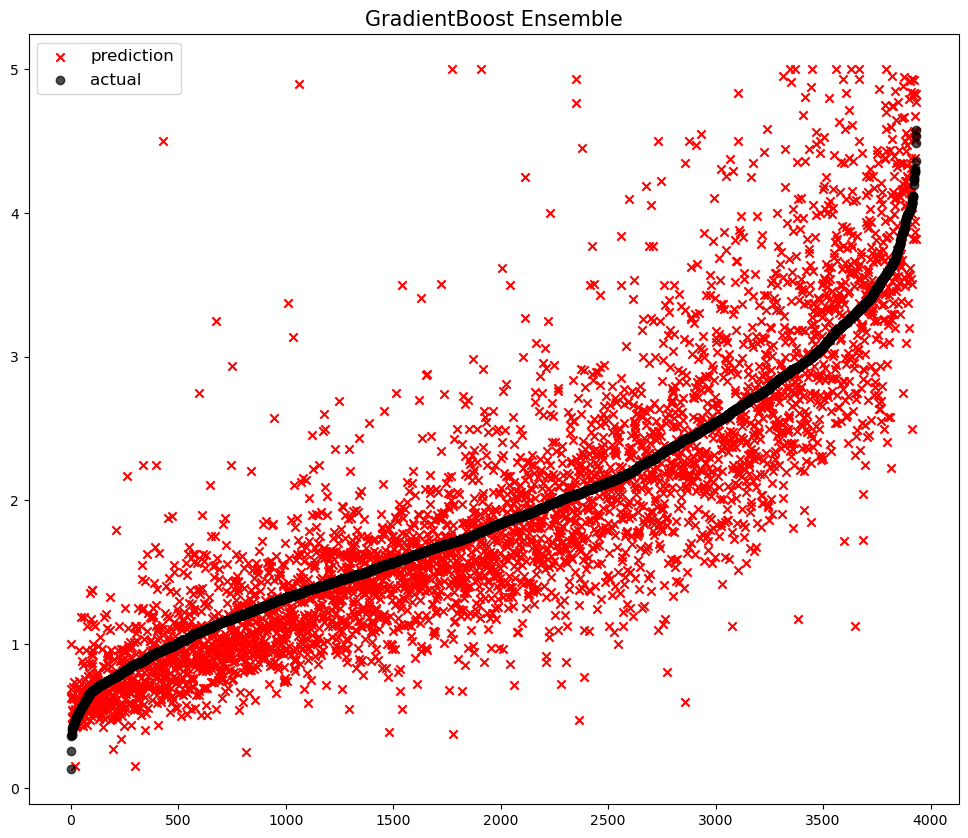

model     error
0                            Lasso  0.434209
1                       ElasticNet  0.424410
2              Standard ElasticNet  0.424381
3                            Ridge  0.423898
4                 LinearRegression  0.423897
5                  Voting Ensemble  0.415333
6                  Poly ElasticNet  0.391494
7  RandomForest Ensemble w/ Tuning  0.266462
8           GradientBoost Ensemble  0.248581
9            RandomForest Ensemble  0.223458

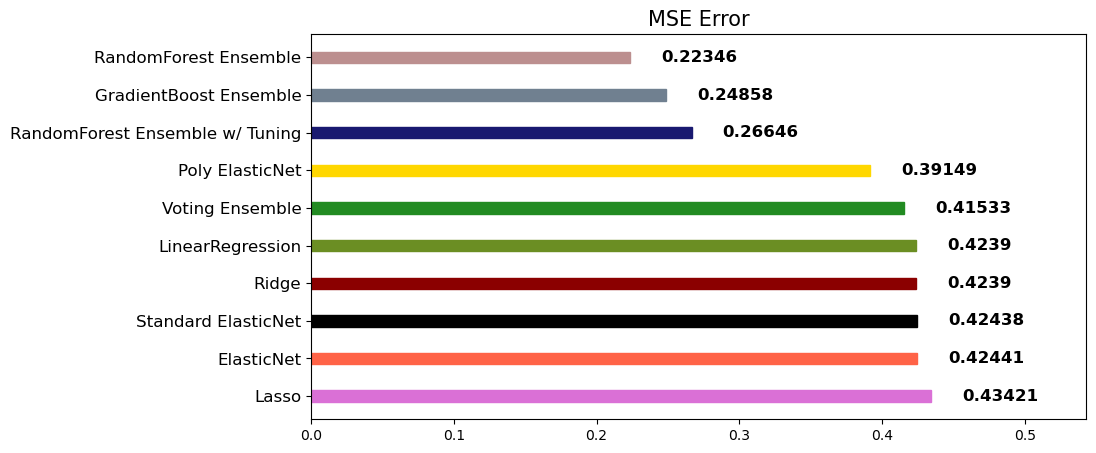

In [50]:
utils.plot_error('GradientBoost Ensemble', gbr_pred, y_test)

**주요 Hyperparameter**
- `random_state`: 랜덤 시드 값. 고정해두고 튜닝할 것!
- `n_jobs`: CPU 사용 개수
- `learning_rate`: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- `n_estimators`: 부스팅 스테이지 수. (랜덤포레스트 트리의 개수 설정과 비슷한 개념). default=100
- `subsample`: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용
- `min_samples_split`: 노드 분할시 최소 샘플의 개수. default=2. 과대적합 방지용

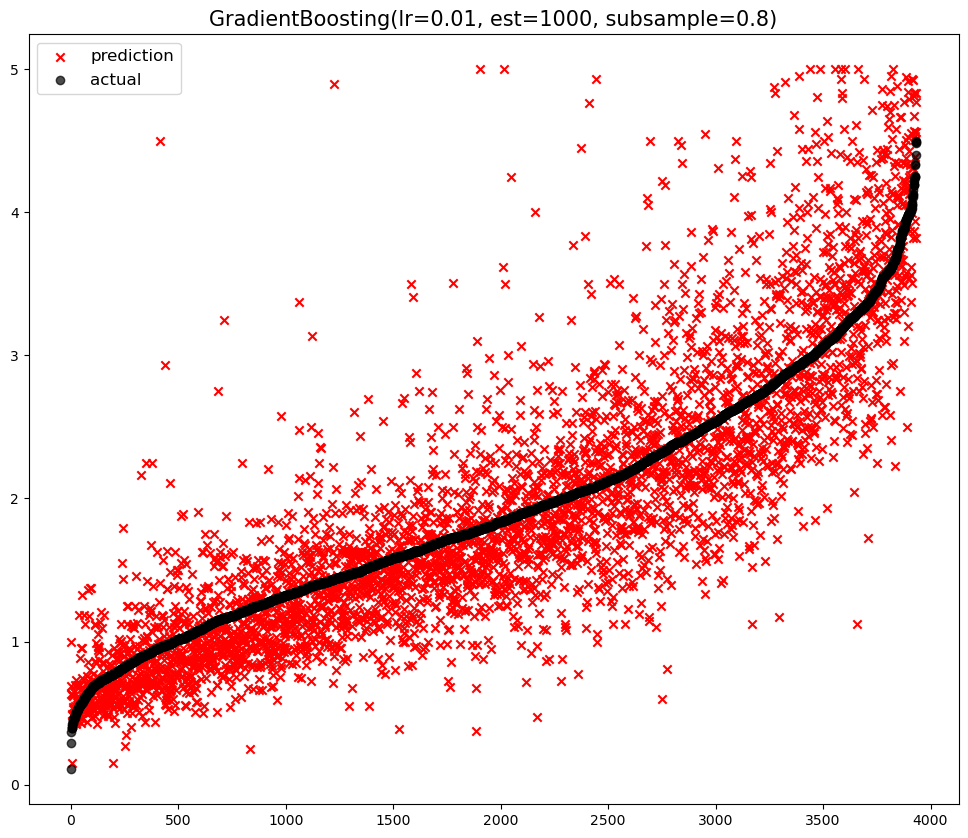

model     error
0                                               Lasso  0.434209
1                                          ElasticNet  0.424410
2                                 Standard ElasticNet  0.424381
3                                               Ridge  0.423898
4                                    LinearRegression  0.423897
5                                     Voting Ensemble  0.415333
6                                     Poly ElasticNet  0.391494
7                     RandomForest Ensemble w/ Tuning  0.266462
8   GradientBoosting(lr=0.01, est=1000, subsample=...  0.248798
9                              GradientBoost Ensemble  0.248581
10                              RandomForest Ensemble  0.223458

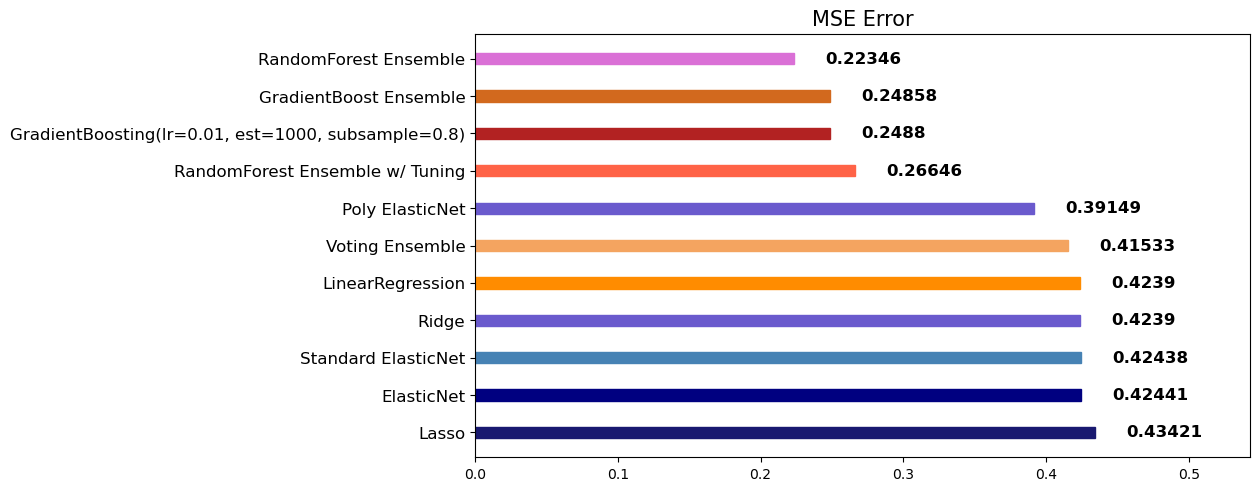

In [51]:
# 하이퍼파라미터 튜닝 수작업 Ver.
# 원하는 값들을 입력하면서 결과를 비교해보세요
gbr = GradientBoostingRegressor(random_state=42, learning_rate=0.01, n_estimators=1000, subsample=0.8)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
utils.plot_error('GradientBoosting(lr=0.01, est=1000, subsample=0.8)', gbr_pred, y_test)

### XGBoost
e**X**treme **G**radient **B**oosting

In [10]:
from xgboost import XGBRegressor, XGBClassifier

In [53]:
# 모델 정의 (random_state = 42)
xgb = XGBRegressor(random_state=42)

# 모델 학습
xgb.fit(X_train,y_train)

# 예측
xgb_pred = xgb.predict(X_test)

# 성능 평가
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

print(f'R2 : {round(xgb_r2, 4)}, MSE : {round(xgb_mse, 4)}')

R2 : 0.8075, MSE : 0.192


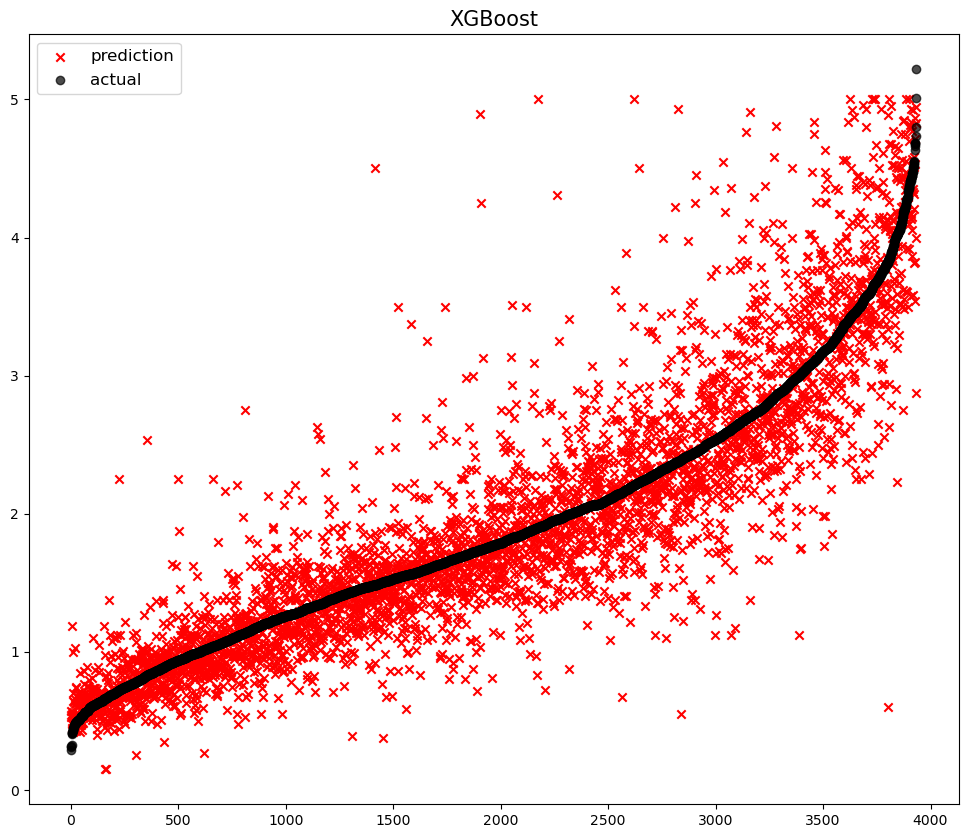

model     error
0                                               Lasso  0.434209
1                                          ElasticNet  0.424410
2                                 Standard ElasticNet  0.424381
3                                               Ridge  0.423898
4                                    LinearRegression  0.423897
5                                     Voting Ensemble  0.415333
6                                     Poly ElasticNet  0.391494
7                     RandomForest Ensemble w/ Tuning  0.266462
8   GradientBoosting(lr=0.01, est=1000, subsample=...  0.248798
9                              GradientBoost Ensemble  0.248581
10                              RandomForest Ensemble  0.223458
11                                            XGBoost  0.191983

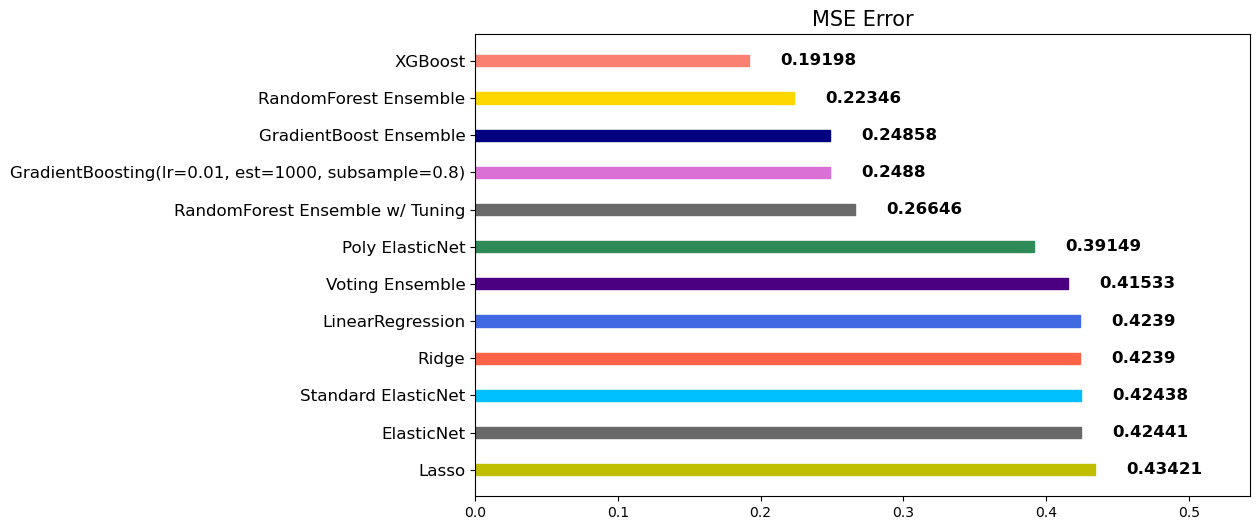

In [54]:
utils.plot_error('XGBoost', xgb_pred, y_test)

**주요 Hyperparameter**
- `random_state`: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- `n_jobs`: CPU 사용 갯수
- `learning_rate`: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- `n_estimators`: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
- `max_depth`: 트리의 깊이. 과대적합 방지용. default=3. 
- `subsample`: 샘플 사용 비율. 과대적합 방지용. default=1.0
- `colsample_bytree`: 최대로 사용할 feature의 비율. 과대적합 방지용. default=1.0

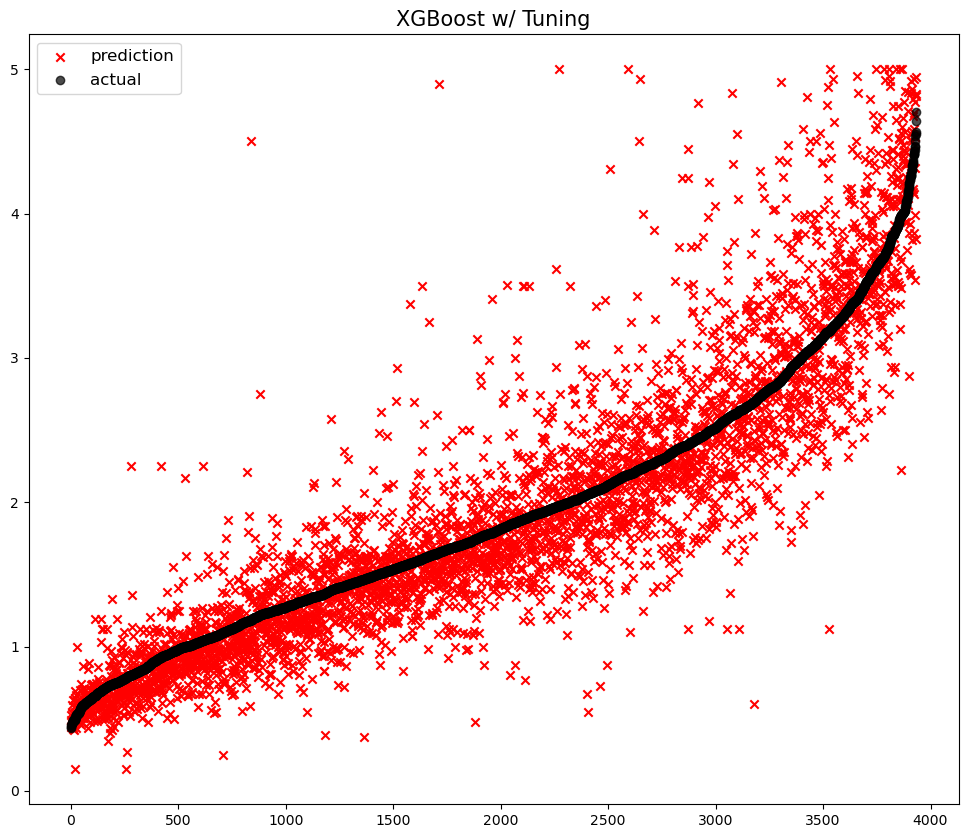

model     error
0                                               Lasso  0.434209
1                                          ElasticNet  0.424410
2                                 Standard ElasticNet  0.424381
3                                               Ridge  0.423898
4                                    LinearRegression  0.423897
5                                     Voting Ensemble  0.415333
6                                     Poly ElasticNet  0.391494
7                     RandomForest Ensemble w/ Tuning  0.266462
8   GradientBoosting(lr=0.01, est=1000, subsample=...  0.248798
9                              GradientBoost Ensemble  0.248581
10                              RandomForest Ensemble  0.223458
11                                            XGBoost  0.191983
12                                  XGBoost w/ Tuning  0.178543

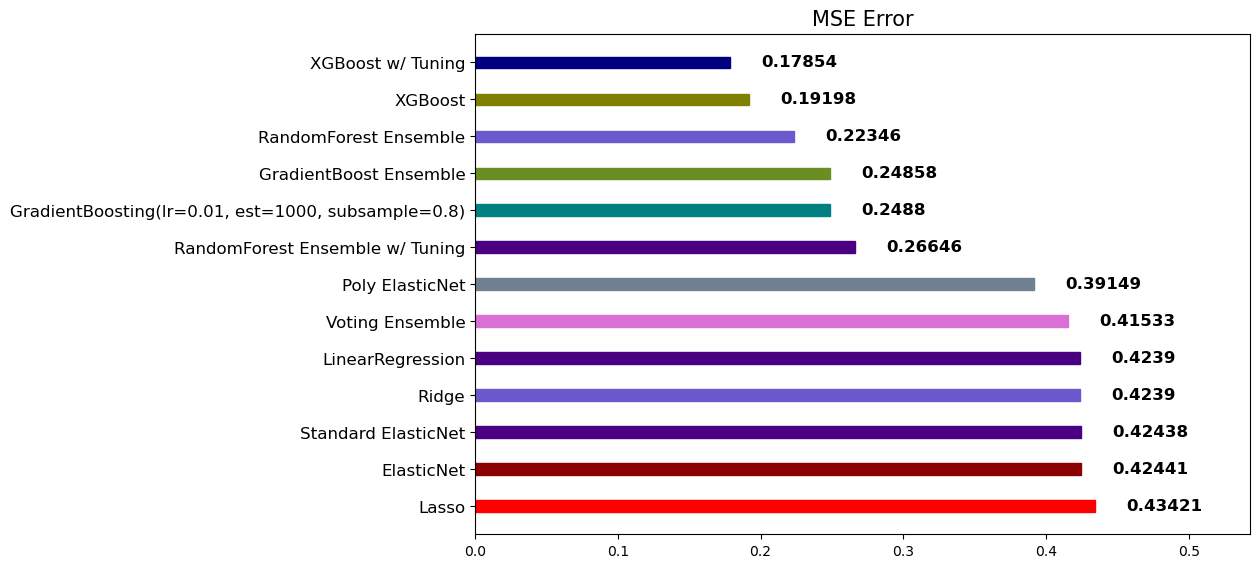

In [55]:
# 하이퍼파라미터 튜닝 수작업 Ver
xgb = XGBRegressor(random_state=42, learning_rate=0.01, n_estimators=1000, subsample=0.8, colsample_bytree=0.8, max_depth=7)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
utils.plot_error('XGBoost w/ Tuning', xgb_pred, y_test)

### LightGBM

In [11]:
from lightgbm import LGBMRegressor, LGBMClassifier

In [57]:
# 모델 정의 (random_state = 42)
lgbm = LGBMRegressor(random_state=42)

# 모델 학습
lgbm.fit(X_train,y_train)

# 예측
lgbm_pred = lgbm.predict(X_test)

# 성능 평가
lgbm_r2 = r2_score(y_test, lgbm_pred)
lgbm_mse = mean_squared_error(y_test, lgbm_pred)

print(f'R2 : {round(lgbm_r2, 4)}, MSE : {round(lgbm_mse, 4)}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15740, number of used features: 8
[LightGBM] [Info] Start training from score 1.921911
R2 : 0.8114, MSE : 0.188


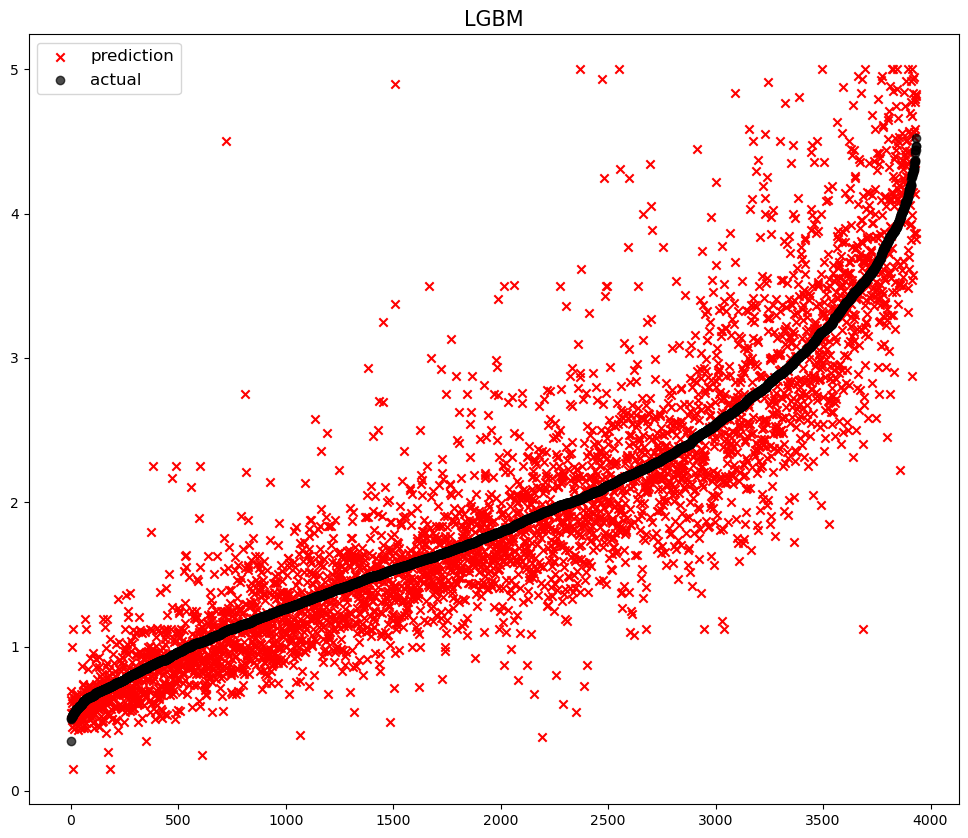

model     error
0                                               Lasso  0.434209
1                                          ElasticNet  0.424410
2                                 Standard ElasticNet  0.424381
3                                               Ridge  0.423898
4                                    LinearRegression  0.423897
5                                     Voting Ensemble  0.415333
6                                     Poly ElasticNet  0.391494
7                     RandomForest Ensemble w/ Tuning  0.266462
8   GradientBoosting(lr=0.01, est=1000, subsample=...  0.248798
9                              GradientBoost Ensemble  0.248581
10                              RandomForest Ensemble  0.223458
11                                            XGBoost  0.191983
12                                               LGBM  0.188020
13                                  XGBoost w/ Tuning  0.178543

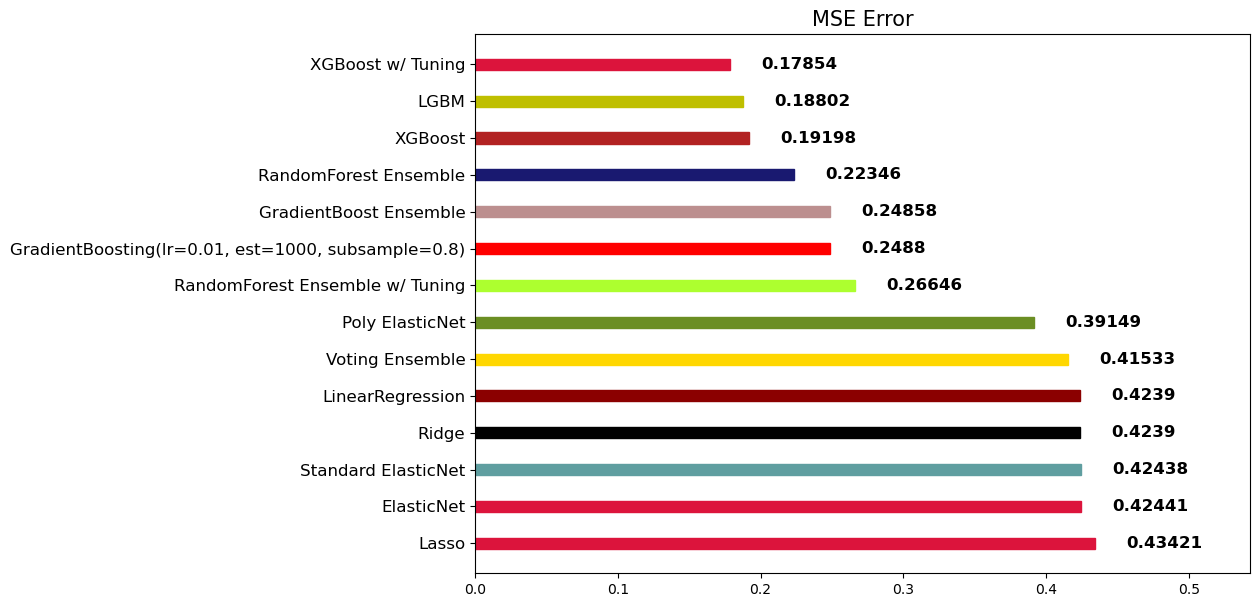

In [58]:
utils.plot_error('LGBM', lgbm_pred, y_test)

**주요 Hyperparameter**
- `random_state`: 랜덤 시드 값. 고정해두고 튜닝할 것!
- `n_jobs`: CPU 사용 개수
- `learning_rate`: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- `n_estimators`: 부스팅 스테이지 수. (랜덤포레스트 트리의 개수 설정과 비슷한 개념). default=100
- `max_depth`: 트리의 깊이. 과대적합 방지용. default=3. 
- `colsample_bytree`: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. default=1.0

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15740, number of used features: 8
[LightGBM] [Info] Start training from score 1.921911


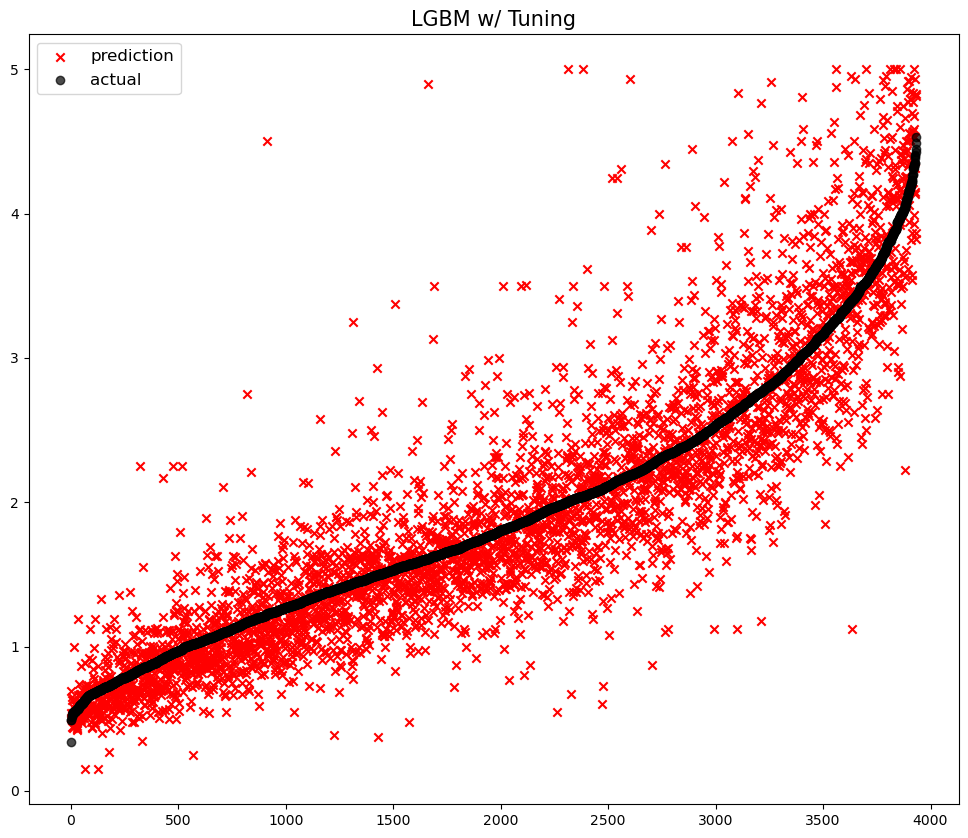

model     error
0                                               Lasso  0.434209
1                                          ElasticNet  0.424410
2                                 Standard ElasticNet  0.424381
3                                               Ridge  0.423898
4                                    LinearRegression  0.423897
5                                     Voting Ensemble  0.415333
6                                     Poly ElasticNet  0.391494
7                     RandomForest Ensemble w/ Tuning  0.266462
8   GradientBoosting(lr=0.01, est=1000, subsample=...  0.248798
9                              GradientBoost Ensemble  0.248581
10                              RandomForest Ensemble  0.223458
11                                            XGBoost  0.191983
12                                               LGBM  0.188020
13                                     LGBM w/ Tuning  0.184207
14                                  XGBoost w/ Tuning  0.178543

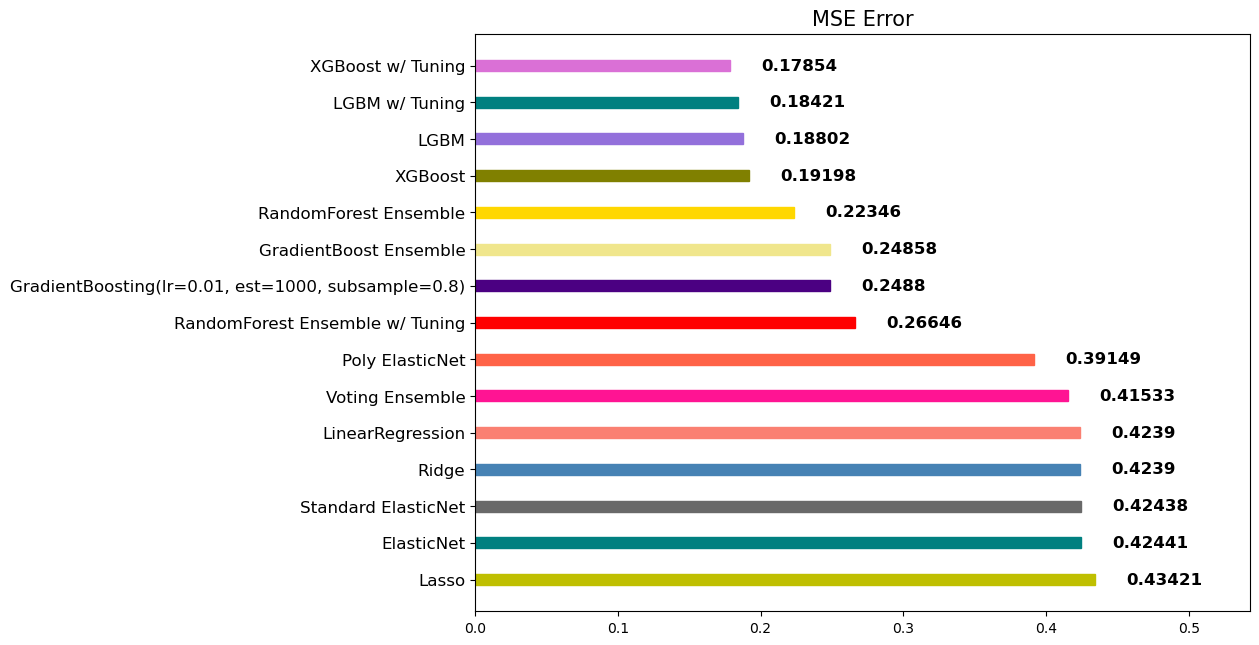

In [59]:
lgbm = LGBMRegressor(random_state=42, learning_rate=0.01, n_estimators=1000, colsample_bytree=0.9, n_jobs=-1)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
utils.plot_error('LGBM w/ Tuning', lgbm_pred, y_test)

## Stacking

[공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html)

In [12]:
from sklearn.ensemble import StackingRegressor

In [61]:
stack_models = [
    ('elasticnet', poly_pipeline), 
    ('randomforest', rfr), 
    ('gbr', gbr),
    ('lgbm', lgbm),
]

In [62]:
# 원래는 xgb 쓰려고 했는데 오류떠서 걍 릿지로 해보겟습니당..
stack_reg = StackingRegressor(estimators = stack_models, final_estimator=Ridge(), n_jobs=-1)

In [63]:
stack_reg.fit(X_train, y_train)
stack_pred = stack_reg.predict(X_test)

# 성능 평가
stack_r2 = r2_score(y_test, stack_pred)
stack_mse = mean_squared_error(y_test, stack_pred)

print(f'R2 : {round(stack_r2, 4)}, MSE : {round(stack_mse, 4)}')


R2 : 0.822, MSE : 0.1775


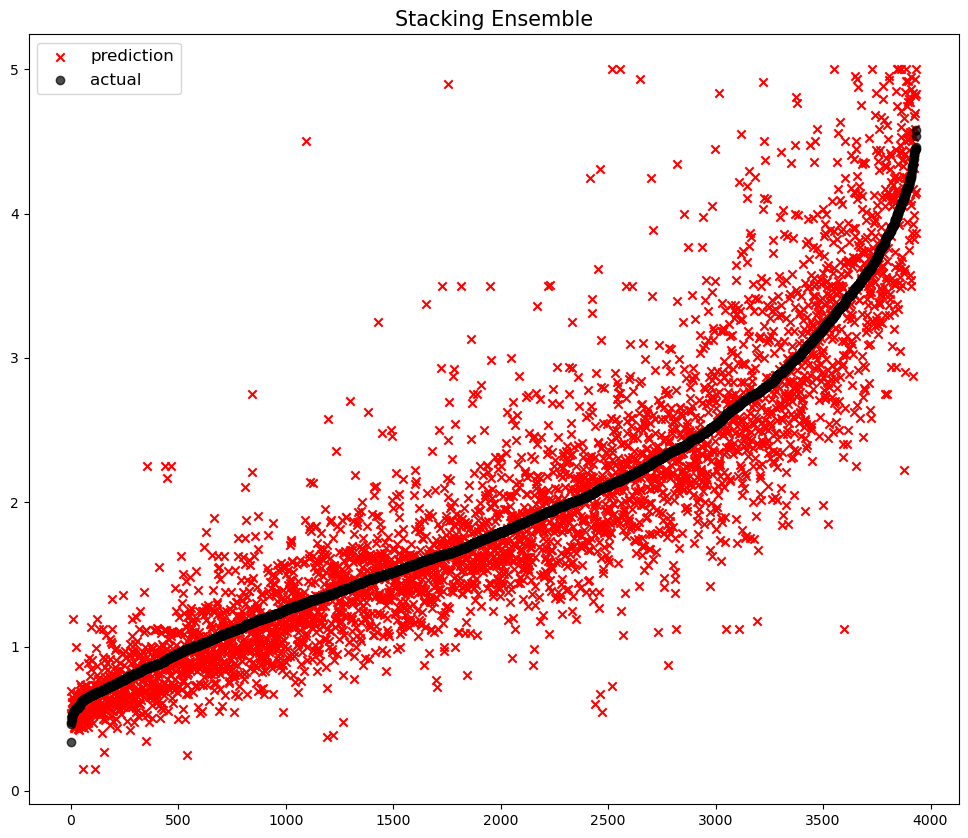

model     error
0                                               Lasso  0.434209
1                                          ElasticNet  0.424410
2                                 Standard ElasticNet  0.424381
3                                               Ridge  0.423898
4                                    LinearRegression  0.423897
5                                     Voting Ensemble  0.415333
6                                     Poly ElasticNet  0.391494
7                     RandomForest Ensemble w/ Tuning  0.266462
8   GradientBoosting(lr=0.01, est=1000, subsample=...  0.248798
9                              GradientBoost Ensemble  0.248581
10                              RandomForest Ensemble  0.223458
11                                            XGBoost  0.191983
12                                               LGBM  0.188020
13                                     LGBM w/ Tuning  0.184207
14                                  XGBoost w/ Tuning  0.178543
15                                  Stacking Ensemble  0.177509

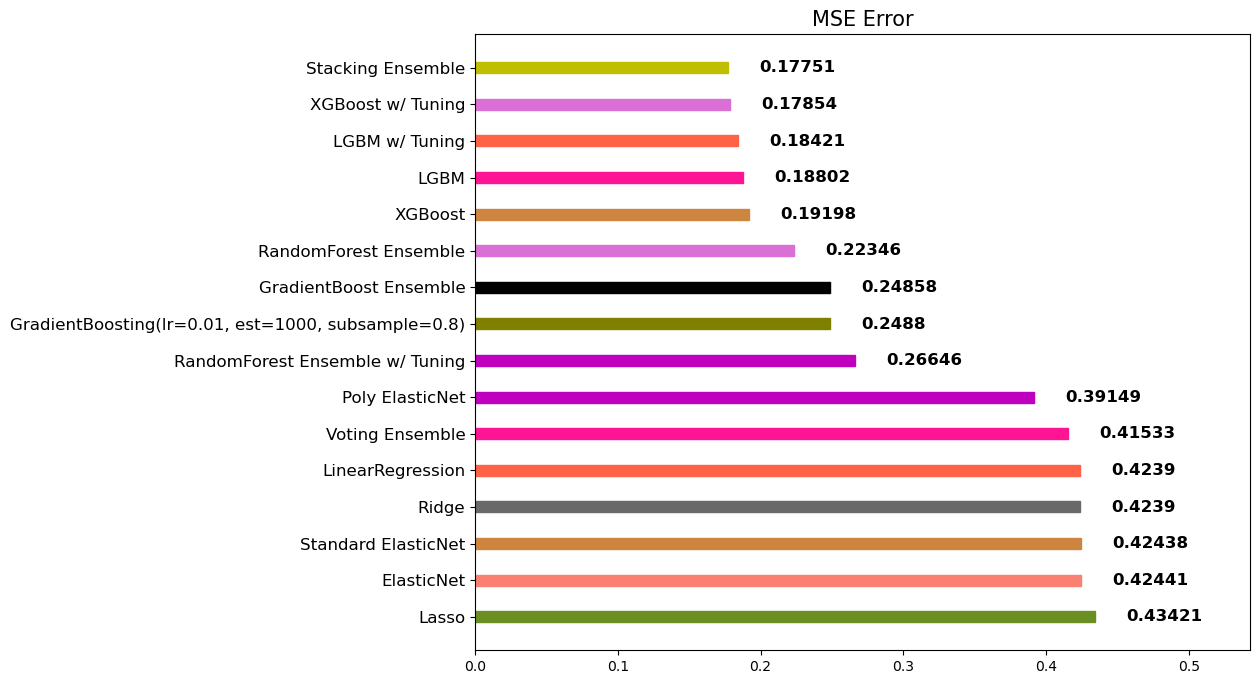

In [64]:
utils.plot_error('Stacking Ensemble', stack_pred, y_test)

# 검증 (Validation)과 튜닝 (Tuning)

## Cross Validation

- Cross Validation이란 모델을 평가하는 하나의 방법입니다.
- K-겹 교차검증(K-fold Cross Validation)을 많이 활용합니다.

- **K-겹 교차검증**은 모든 데이터가 최소 한 번은 테스트셋으로 쓰이도록 합니다.

### K-Fold Cross Validation

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [66]:
n_splits = 5
kfold = KFold(n_splits=n_splits, random_state=9999, shuffle=True)

In [67]:
lgbm_fold = LGBMRegressor(random_state=42, n_jobs=-1)

In [68]:
i = 1
total_error = 0
for train_index, test_index in kfold.split(X):
    x_train_fold, x_valid_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_valid_fold = y.iloc[train_index], y.iloc[test_index]
    
    lgbm_pred_fold = lgbm_fold.fit(x_train_fold, y_train_fold).predict(x_valid_fold)
    error = mean_squared_error(lgbm_pred_fold, y_valid_fold)
    print('Fold = {}, prediction score = {:.2f}'.format(i, error))
    total_error += error
    i+=1
print('---'*10)
print('Average Error: %s' % (total_error / n_splits))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000742 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15740, number of used features: 8
[LightGBM] [Info] Start training from score 1.926282
Fold = 1, prediction score = 0.19
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15740, number of used features: 8
[LightGBM] [Info] Start training from score 1.930059
Fold = 2, prediction score = 0.18
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train s

## Hyperparameter 튜닝

- hypterparameter 튜닝시 경우의 수가 너무 많습니다.
- 따라서, 우리는 자동화할 필요가 있습니다.

sklearn 패키지에서 자주 사용되는 hyperparameter 튜닝을 돕는 클래스는 다음 2가지가 있습니다.

1. **RandomizedSearchCV**
2. **GridSearchCV**

**적용하는 방법**

1. 사용할 Search 방법을 선택합니다.
2. hyperparameter 도메인을 설정합니다. (`max_depth`, `n_estimators`..등등)
3. 학습을 시킨 후, 기다립니다.
4. 도출된 결과 값을 모델에 적용하고 성능을 비교합니다.

## RandomizedSearchCV

- 모든 매개 변수 값이 시도되는 것이 아니라 지정된 분포에서 고정된 수의 매개변수 설정이 샘플링됩니다. 
- 시도된 매개 변수 설정의 수는 `n_iter`에 의해 제공됩니다.

**주요 Hyperparameter (LGBM)**
- `random_state`: 랜덤 시드 값. 고정해두고 튜닝할 것!
- `n_jobs`: CPU 사용 개수
- `learning_rate`: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- `n_estimators`: 부스팅 스테이지 수. (랜덤포레스트 트리의 개수 설정과 비슷한 개념). default=100
- `max_depth`: 트리의 깊이. 과대적합 방지용. default=3. 
- `colsample_bytree`: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. default=1.0

In [69]:
params = {
    'n_estimators': [200, 500, 1000], 
    'learning_rate': [0.1, 0.05, 0.025], 
    'max_depth': [6, 7, 8], 
    'colsample_bytree': [0.8, 0.9, 1.0], 
    'subsample': [0.8, 0.9, 1.0],
}

In [14]:
from sklearn.model_selection import RandomizedSearchCV

`n_iter` 값을 조절하여, 총 몇 회의 시도를 진행할 것인지 정의합니다.

(시도가 늘어나면, 더 좋은 parameter를 찾을 확률은 올라가지만, 그만큼 시간이 오래걸립니다.)

In [71]:
clf = RandomizedSearchCV(LGBMRegressor(), params, random_state=42, cv=3, n_iter=25, n_jobs=-1, scoring='neg_mean_squared_error')

In [72]:
clf.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15740, number of used features: 8
[LightGBM] [Info] Start training from score 1.921911
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=25, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.1, 0.05, 0.025],
                                        'max_depth': [6, 7, 8],
                                        'n_estimators': [200, 500, 1000],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [73]:
abs(clf.best_score_)

0.17264292304557105

In [74]:
clf.best_params_

{'subsample': 0.8,
 'n_estimators': 1000,
 'max_depth': 6,
 'learning_rate': 0.05,
 'colsample_bytree': 0.8}

In [75]:
LGBMRegressor(**clf.best_params_)

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05, max_depth=6,
              n_estimators=1000, subsample=0.8)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15740, number of used features: 8
[LightGBM] [Info] Start training from score 1.921911
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

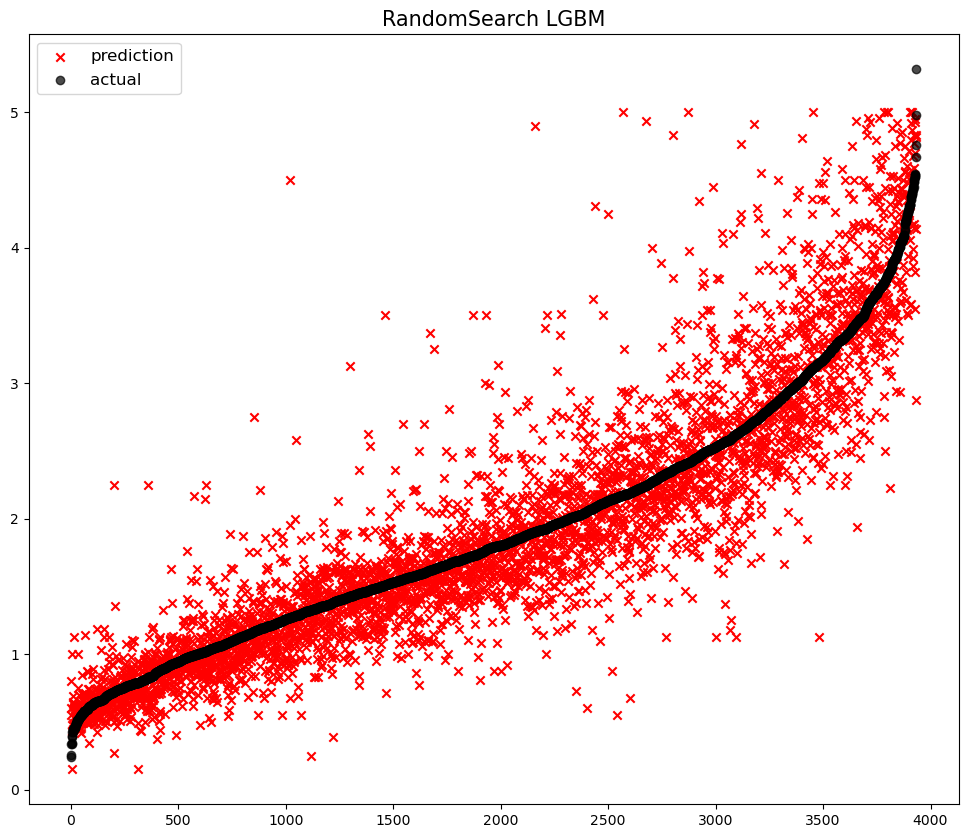

model     error
0                                               Lasso  0.434209
1                                          ElasticNet  0.424410
2                                 Standard ElasticNet  0.424381
3                                               Ridge  0.423898
4                                    LinearRegression  0.423897
5                                     Voting Ensemble  0.415333
6                                     Poly ElasticNet  0.391494
7                     RandomForest Ensemble w/ Tuning  0.266462
8   GradientBoosting(lr=0.01, est=1000, subsample=...  0.248798
9                              GradientBoost Ensemble  0.248581
10                              RandomForest Ensemble  0.223458
11                                            XGBoost  0.191983
12                                               LGBM  0.188020
13                                     LGBM w/ Tuning  0.184207
14                                  XGBoost w/ Tuning  0.178543
15                                  Stacking Ensemble  0.177509
16                                  RandomSearch LGBM  0.170242

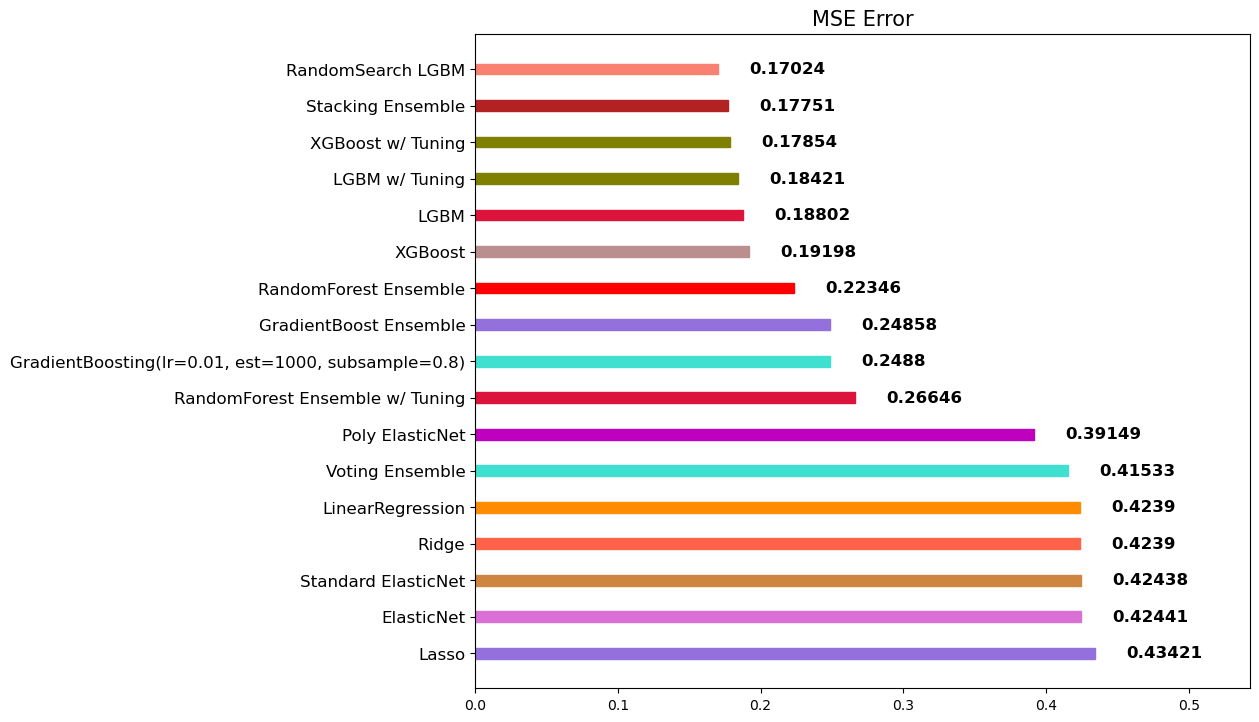

In [76]:
lgbm_best = LGBMRegressor(**clf.best_params_)
lgbm_best.fit(X_train, y_train)
lgbm_best_pred = lgbm_best.predict(X_test)
utils.plot_error('RandomSearch LGBM', lgbm_best_pred, y_test)

## GridSearchCV

- 모든 매개 변수 값에 대하여 **완전 탐색**을 시도합니다.
- 따라서, 최적화할 parameter가 많다면, **시간이 매우 오래** 걸립니다.

In [77]:
params = {
    'n_estimators': [500, 1000], 
    'learning_rate': [0.1, 0.05, 0.01], 
    'num_leaves': [9, 12, 15], 
    'colsample_bytree': [0.8, 0.9], 
    'subsample': [0.8, 0.9,],
}

In [15]:
from sklearn.model_selection import GridSearchCV

In [79]:
grid_search = GridSearchCV(LGBMRegressor(), params, n_jobs=-1, cv=3, scoring='neg_mean_squared_error')

In [80]:
grid_search.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15740, number of used features: 8
[LightGBM] [Info] Start training from score 1.921911


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'n_estimators': [500, 1000], 'num_leaves': [9, 12, 15],
                         'subsample': [0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [81]:
abs(grid_search.best_score_)

0.17374016071815324

In [82]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'n_estimators': 1000,
 'num_leaves': 15,
 'subsample': 0.8}

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 15740, number of used features: 8
[LightGBM] [Info] Start training from score 1.921911


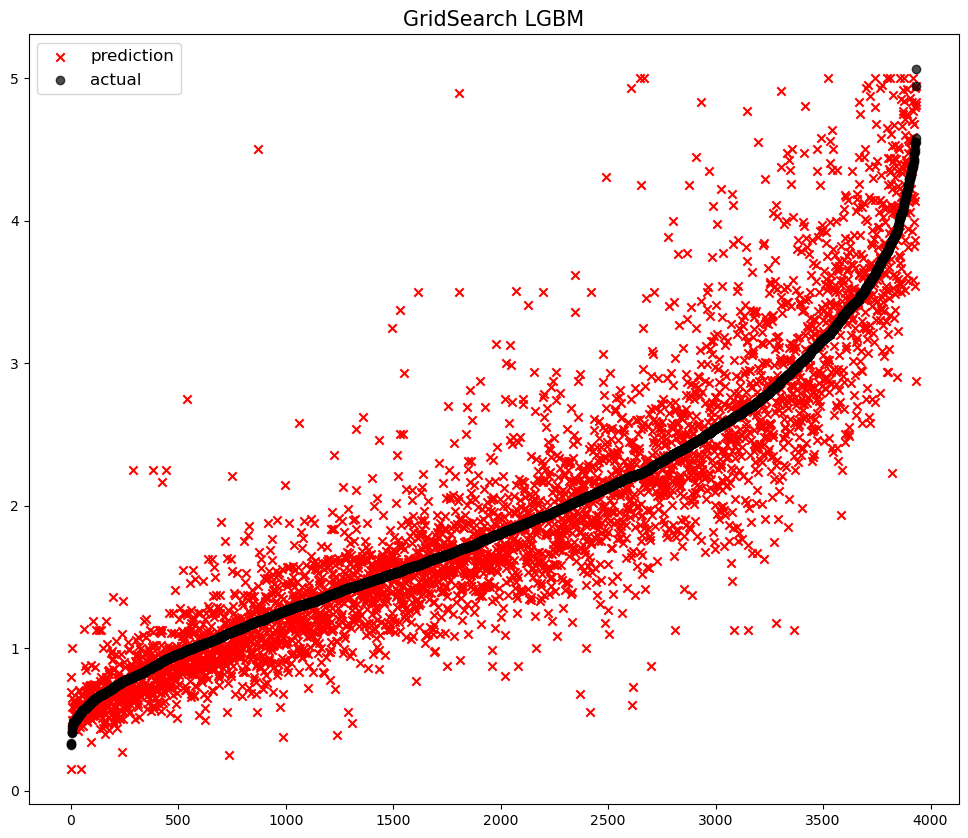

model     error
0                                               Lasso  0.434209
1                                          ElasticNet  0.424410
2                                 Standard ElasticNet  0.424381
3                                               Ridge  0.423898
4                                    LinearRegression  0.423897
5                                     Voting Ensemble  0.415333
6                                     Poly ElasticNet  0.391494
7                     RandomForest Ensemble w/ Tuning  0.266462
8   GradientBoosting(lr=0.01, est=1000, subsample=...  0.248798
9                              GradientBoost Ensemble  0.248581
10                              RandomForest Ensemble  0.223458
11                                            XGBoost  0.191983
12                                               LGBM  0.188020
13                                     LGBM w/ Tuning  0.184207
14                                  XGBoost w/ Tuning  0.178543
15                                  Stacking Ensemble  0.177509
16                                    GridSearch LGBM  0.172863
17                                  RandomSearch LGBM  0.170242

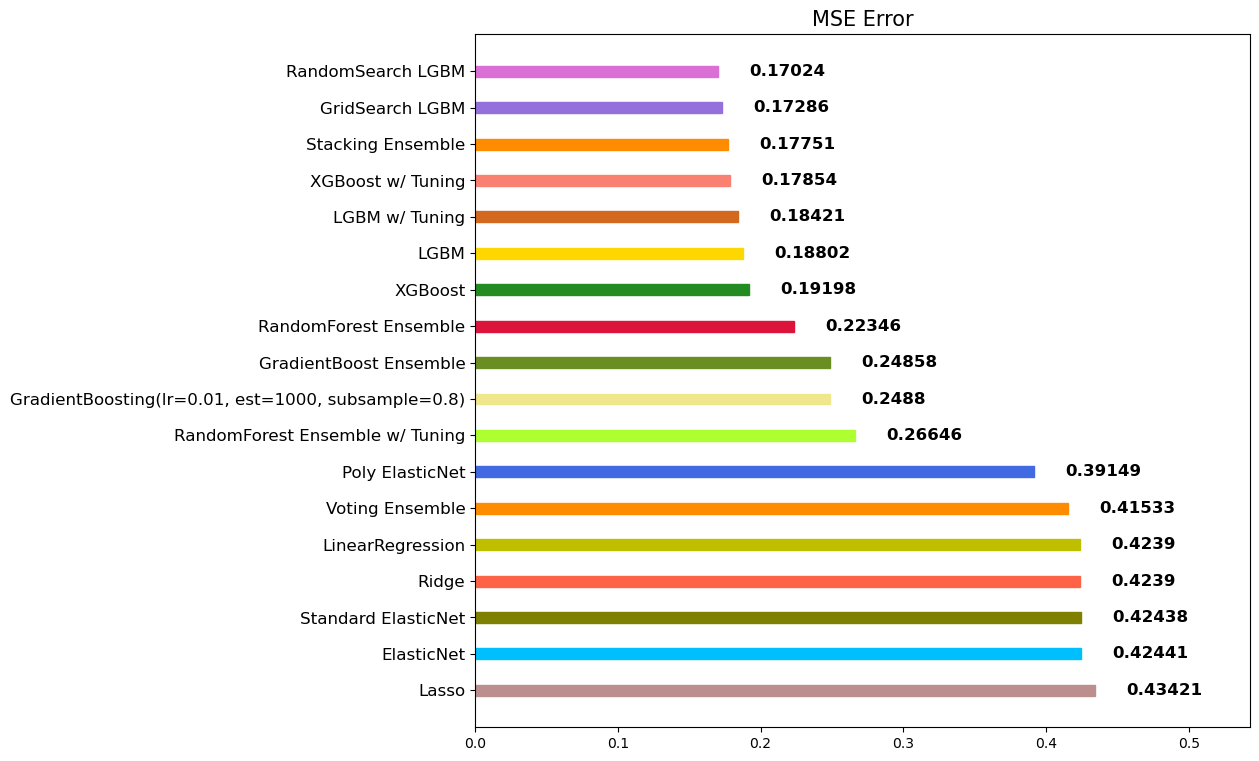

In [83]:
lgbm_best = LGBMRegressor(**grid_search.best_params_)
lgbm_best.fit(X_train, y_train)
lgbm_best_pred = lgbm_best.predict(X_test)
utils.plot_error('GridSearch LGBM', lgbm_best_pred, y_test)

---
---
# [과제2] 모델 성능을 높여봅시다!

이제 직접 다른 전처리 기법, 피쳐 엔지니어링, 앙상블 기법, 추가 하이퍼파라미터 튜닝 등등..을 수행해서  
아래 데이터셋을 활용해 더 높은 정확도를 가지는 모델을 만들어보세요!  
다양한 방법을 수행해보고, 비교한 후 결과를 정리해서 마크다운으로 남겨주시면 되겠습니다.   
이때 각 단계별로 어떤 방법을 수행했는지에 대한 주석을 꼼꼼히 달아주세요.  

- voting, bagging, boosting, stacking 중 어떤 모델을 사용하셔도 됩니다
- 정확도는 소수점 자릿수 제한 없이 모두 출력합니다.
- `random_state`는 모두 'SEED'로 고정해주세요.
- 모델을 출력하는 코드는 아래를 참고하세요

```python
model = #원하는 모델 넣기
model.fit(X_train, y_train)
y_model_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_model_pred)}")
```

In [52]:
# 데이터 분할 및 교차 검증
from sklearn.model_selection import cross_val_score

# 성능 평가 지표
from sklearn.metrics import accuracy_score, classification_report

# 기본 분류 모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 앙상블 모델
from sklearn.ensemble import (
    VotingClassifier,      # 보팅
    BaggingClassifier,     # 배깅
    RandomForestClassifier, # 랜덤 포레스트
    AdaBoostClassifier,    # 에이다부스트
    GradientBoostingClassifier, # 그래디언트 부스팅
    StackingClassifier     # 스태킹
)

# 부스팅 라이브러리
import xgboost as xgb           # XGBoost
import lightgbm as lgb          # LightGBM
from catboost import CatBoostClassifier  # CatBoost

SEED = 42

In [53]:
# ===== 데이터 준비 =====
df = pd.read_csv('Telco-Customer-Churn.csv')

## 데이터셋 소개: Telco Customer Churn

<a>https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

### 데이터셋 설명
- **출처**: IBM Sample Data / Kaggle
- **문제 유형**: 이진 분류 (Binary Classification)
- **예측 목표**: 고객의 이탈 여부 예측 (Churn: Yes/No)
- **데이터 크기**: 7,043개 행, 21개 열
- **실무 활용**: 통신사, 구독 서비스 등에서 고객 이탈 방지 전략 수립에 활용

### 주요 특징
- **클래스 불균형**: 이탈 고객 약 27%, 유지 고객 약 73%
- **다양한 변수 유형**: 범주형 변수와 수치형 변수 혼합
- **실무 유사성**: 실제 비즈니스 문제와 매우 유사한 구조

### 변수 설명

#### 1. 고객 정보
- `customerID`: 고객 ID (분석에서 제외)
- `gender`: 성별 (Male/Female)
- `SeniorCitizen`: 고령자 여부 (0/1)
- `Partner`: 배우자 유무 (Yes/No)
- `Dependents`: 부양가족 유무 (Yes/No)

#### 2. 서비스 정보
- `tenure`: 서비스 이용 개월 수
- `PhoneService`: 전화 서비스 가입 여부
- `MultipleLines`: 복수 회선 여부
- `InternetService`: 인터넷 서비스 유형 (DSL/Fiber optic/No)
- `OnlineSecurity`: 온라인 보안 서비스
- `OnlineBackup`: 온라인 백업 서비스
- `DeviceProtection`: 기기 보호 서비스
- `TechSupport`: 기술 지원 서비스
- `StreamingTV`: TV 스트리밍 서비스
- `StreamingMovies`: 영화 스트리밍 서비스

#### 3. 계약 정보
- `Contract`: 계약 유형 (Month-to-month/One year/Two year)
- `PaperlessBilling`: 전자 청구서 사용 여부
- `PaymentMethod`: 결제 방법
- `MonthlyCharges`: 월 요금
- `TotalCharges`: 총 납부 금액

#### 4. 타겟 변수
- `Churn`: 이탈 여부 (Yes/No) - **예측 목표**

In [156]:
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     PaperlessBilling              PaymentMethod MonthlyCharges TotalCharges  \
0                 Yes           Electronic check          29.85        29.85   
1                  No               Mailed check          56.95       1889.5   
2                 Yes               Mailed check          53.85       108.15   
3                  No  Bank transfer (automatic)          42.30      1840.75   
4                 Yes           Electronic check          70.70       151.65   
...               ...                        ...            ...          ...   
7038              Yes               Mailed check          84.80       1990.5   
7039              Yes    Credit card (automatic)         103.20       7362.9   
7040              Yes           Electronic check          29.60       346.45   
7041              Yes               Mailed check          74.40        306.6   
7042              Yes  Bank transfer (automatic)         105.65       6844.5   

     Churn Num_of_Services Cost_per_Service Pay_Automatic  Household  \
0       No               2        14.925000             0     Couple   
1       No               4        14.237500             0     Single   
2      Yes               4        13.462500             0     Single   
3       No               4        10.575000             1     Single   
4      Yes               2        35.350000             0     Single   
...    ...             ...              ...           ...        ...   
7038    No               7        12.114286             0     Family   
7039    No               6        17.200000             1     Family   
7040    No               2        14.800000             0     Family   
7041   Yes               2        37.200000             0     Couple   
7042    No               7        15.092857             1     Single   

     tenure_contract  
0                  1  
1                  0  
2                  1  
3                  0  
4                  1  
...              ...  
7038               0  
7039               0  
7040               1  
7041               1  
7042               0  

[7043 rows x 26 columns]

In [54]:
# 파생변수 생성: tenure가 중앙값 보다 작고, 월결제인 경우 1. 나머지 0

df['tenure_contract']=0
df.loc[(df['tenure'] < df['tenure'].median()) & (df['Contract']=='Month-to-month'),'tenure_contract']=1


In [55]:
# 파생변수 생성: 가족 구성원

df.loc[(df["Partner"] == "No") & (df["Dependents"] == "No"), "Household"] = "Single"
df.loc[(df["Partner"] == "No") & (df["Dependents"] != "No"), "Household"] = "OnlyDependents"
df.loc[(df["Partner"] != "No") & (df["Dependents"] == "No"), "Household"] = "Couple"
df.loc[(df["Partner"] != "No") & (df["Dependents"] != "No"), "Household"] = "Family"

In [56]:
# 파생변수 생성: 결제 방식이 자동 -> 1, 수동 -> 0
df["Pay_Automatic"] = (
    df["PaymentMethod"].str.contains("automatic", na=False).astype(int)
)

In [57]:
# 파생변수 생성: 이용하는 서비스 개수

n_cols = [
    "PhoneService", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
]

mask = (
    (df[n_cols] != "No")
    & (df[n_cols] != "No internet service")
)

df["Num_of_Services"] = mask.sum(axis=1)

In [58]:
# 파생변수 생성: 사용 서비스별 평균 비용
df['Cost_per_Service']=df['MonthlyCharges']/df['Num_of_Services']

In [59]:
target = "Churn"
X = df.drop(columns=[target, "customerID"])
y = df[target].map({"Yes": 1, "No": 0}).astype(int)

In [60]:
# 범주형 변수 인코딩
cat_cols = [
    'gender', 'Partner', 'Dependents', 
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod','Pay_Automatic','Household','tenure_contract'
]

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# TotalCharges 처리
if X['TotalCharges'].dtype == 'object':
    X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')
    X['TotalCharges'].fillna(X['TotalCharges'].median(), inplace=True)

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.25,
    random_state=SEED,
    stratify=y
)

In [61]:
model = XGBClassifier(random_state=SEED) # xgboost
model.fit(X_train, y_train)
y_model_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_model_pred)}")

Model Accuracy: 0.7756956274843839


In [62]:
model = RandomForestClassifier(random_state=SEED) #randomforest
model.fit(X_train, y_train)
y_model_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_model_pred)}")

Model Accuracy: 0.7876206700738216


In [63]:
model = LGBMClassifier(random_state=SEED) #lightgbm
model.fit(X_train, y_train)
y_model_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_model_pred)}")

[LightGBM] [Info] Number of positive: 1402, number of negative: 3880
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 5282, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265430 -> initscore=-1.017935
[LightGBM] [Info] Start training from score -1.017935
Model Accuracy: 0.794434980124929


In [64]:
# randomforest randomizedsearch

params = {
    "n_estimators": [150, 200, 250],
    "max_depth": [6, 7, 8],
    "max_features": ["sqrt", 0.7, 0.8, 0.9, 1.0],
    "min_samples_split": [3, 4, 5],
    "min_samples_leaf": [2, 3, 4],
    "bootstrap": [True],
}

clf_rr = RandomizedSearchCV(
    RandomForestClassifier(), 
    params,
    cv=3, 
    n_iter=50, 
    n_jobs=-1, 
    scoring='neg_mean_squared_error')

clf_rr.fit(X_train, y_train)

print(abs(clf_rr.best_score_))

print(clf_rr.best_params_)

RandomForestClassifier(**clf_rr.best_params_)

rfc_best = RandomForestClassifier(**clf_rr.best_params_)
rfc_best.fit(X_train, y_train)
rfc_best_pred = rfc_best.predict(X_test)

test_acc = accuracy_score(y_test, rfc_best_pred)
print(f"Test Accuracy: {test_acc:.4f}")

0.19594991654190974
{'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 7, 'bootstrap': True}
Test Accuracy: 0.7967


In [ ]:
# xgboost randomizedsearch
# 얘가 최종 선정한 모델 & 하이퍼파라미터입니다.

params = {
    "n_estimators": [800,1000,1200],
    "max_depth": [2, 3, 4, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.4, 0.5, 0.6, 0.7, 0.8],
    "colsample_bytree": [0.7, 0.8, 0.9, 1.0],
    "gamma": [3, 5, 7, 10],
    "reg_lambda": [2, 3, 4],
}

num_classes = len(np.unique(y_train))

xgb = XGBClassifier(
    objective="multi:softprob",
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42,
    num_class=num_classes,
)

clf_xr = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=params,
    random_state=42,
    cv=3,
    n_iter=50,
    n_jobs=-1,
    scoring="accuracy",
)

clf_xr.fit(X_train, y_train)

print(clf_xr.best_params_)

xgb_best = XGBClassifier(**clf_xr.best_params_)
xgb_best.fit(X_train, y_train)

xgb_best_pred = xgb_best.predict(X_test)
test_acc = accuracy_score(y_test, xgb_best_pred)
print(f"Test Accuracy: {test_acc:.4f}")

{'subsample': 0.4, 'reg_lambda': 4, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 5, 'colsample_bytree': 1.0}
Test Accuracy: 0.8064


In [71]:
# xgboost gridsearch

params = {
    "n_estimators": [800,1000,1200],
    "max_depth": [2, 3, 4],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.4, 0.5, 0.6, 0.7, 0.8],
    "colsample_bytree": [0.7, 0.8, 0.9, 1.0],
    "gamma": [3, 5, 7],
    "reg_lambda": [2, 3, 4],
}

clf_xg = GridSearchCV(
    estimator=xgb,
    param_grid=params,
    cv=3,
    n_jobs=-1,
    scoring="accuracy",
)

clf_xg.fit(X_train, y_train)

print(clf_xg.best_score_)
print(clf_xg.best_params_)

xgb_best = XGBClassifier(**clf_xg.best_params_)
xgb_best.fit(X_train, y_train)

xgb_best_pred = xgb_best.predict(X_test)
test_acc = accuracy_score(y_test, xgb_best_pred)
print(f"Test Accuracy: {test_acc:.4f}")

nan
{'colsample_bytree': 0.7, 'gamma': 3, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 800, 'reg_lambda': 2, 'subsample': 0.4}
Test Accuracy: 0.8012


In [184]:
# lgbm randomizedsearch

params = {
    "n_estimators": [600, 800, 1000],
    "learning_rate": [0.003, 0.005, 0.01, 0.03, 0.05],
    "num_leaves": [2, 4, 6, 9, 12],
    "max_depth": [5, 7, 9],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    "subsample": [0.5, 0.6, 0.7],
    "min_child_samples": [3, 5, 10],
    "reg_lambda": [1, 3, 5],
    "reg_alpha": [0, 0.5, 1, 5],
    "min_split_gain": [0, 0.01, 0.05],
}

clf_lr = RandomizedSearchCV(
    LGBMClassifier(), 
    params, random_state=42, 
    cv=3, 
    n_iter=50, 
    n_jobs=-1, 
    scoring='neg_mean_squared_error')

clf_lr.fit(X_train, y_train)

print(abs(clf_lr.best_score_))

print(clf_lr.best_params_)

LGBMClassifier(**clf_lr.best_params_)

lgbm_best = LGBMClassifier(**clf_lr.best_params_)
lgbm_best.fit(X_train, y_train)
lgbm_best_pred = lgbm_best.predict(X_test)

test_acc = accuracy_score(y_test, lgbm_best_pred)
print(f"Test Accuracy: {test_acc:.4f}")

[LightGBM] [Info] Number of positive: 1402, number of negative: 3880
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 5282, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265430 -> initscore=-1.017935
[LightGBM] [Info] Start training from score -1.017935
0.1912164661951715
{'subsample': 0.5, 'reg_lambda': 5, 'reg_alpha': 0.5, 'num_leaves': 2, 'n_estimators': 800, 'min_split_gain': 0.01, 'min_child_samples': 5, 'max_depth': 7, 'learning_rate': 0.03, 'colsample_bytree': 0.7}
[LightGBM] [Info] Number of positive: 1402, number of negative: 3880
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000632 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Numbe

마지막으로, 아래 내용을 마크다운 셀에 정리해주세요
- 1. 과제 1 실행해보며 느낀 점
- 2. 과제 2에서 사용한 모델
- 3. 과제 2 모델 튜닝할 때 사용한 방법, 그리고 그렇게 해서 찾은 하이퍼파라미터값
- 4. 튜닝한 모델로 예측한 결과 (바로 위 셀 출력 결과 복사 붙여넣기)

> 모델 정확도가 가장 높은 3인에게는 깜짝 선물이!!

### 1. 과제 1 실행해보며 느낀 점
- 이전에는 앙상블 모델들에 대해 파편화된 지식만 있었고, 각 모델별 강점이나 취약점을 제대로 인지하고 있지는 않았습니다. 이번 세션과 과제를 통해 각 앙상블 모델의 공통적인 부분과 다른 점, 특징 등을 학습하고 개념적으로 재정립할 수 있었습니다.

### 2. 과제2에서 사용한 모델
- xgboost모델을 사용했고, randomsearch를 통해 하이퍼파라미터를 튜닝했습니다. 앙상블 모델인 랜덤포레스트, xgboost, lightgbm등을 한 번씩 돌려봤는데, xgboost가 성능이 가장 높게 나와서 xgboost를 베이스로 사용했습니다.
- xgboost의 하이퍼파라미터를 조정해도 크게 성능이 개선되지는 않아서 가족 구성원, 구독하는 서비스 개수, 결제 방식 등등 파생변수를 만들어 X에 넣었습니다. 사실 만들었던 파생변수가 유의미하게 성능을 끌어올려줄거라고 기대했는데, 거기서 거기네요.

### 3. 과제 2 모델 튜닝할 때 사용한 방법, 그리고 그렇게 해서 찾은 하이퍼파라미터값
- 하이퍼파라미터값: {'subsample': 0.4, 'reg_lambda': 4, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 5, 'colsample_bytree': 1.0}
- randomsearch를 계속 돌려서 최적의 파라미터가 랜덤으로 찾는 범위의 중앙값이 되도록 튜닝했습니다. 그러다가 성능이 낮아지는 경우도 있어, 회차를 반복해서 최적의 성능이 나오는 파라미터값을 찾았습니다.

### 4. 튜닝한 모델로 예측한 결과
- Test Accuracy: 0.8064

수고하셨습니다!